<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(boston_houses):
    """
    Standarize and returns snake_case columns
    """
    boston_houses.columns=[col.lower().replace(" ","_") for col in boston_houses.columns]

def change_to_datetime(boston_houses):
    """
    Changing date to datetime formate
    """
    boston_houses['date'] = pd.to_datetime(boston_houses['date'])
    return boston_houses

<h1 style="color: #e3db24;">01 | Data Extraction</h1>

In [6]:
# needs to be changed when finally putting it in repo
data = pd.read_csv("king_ country_ houses_aa.csv")

<h2 style="color: #ec7511;">Exploring the Data (First Impression)</h2>

In [8]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


In [9]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21154,1235700052,20140630T000000,963000.00,4,3.25,3530,8589,2.00,0,0,3,10,3530,0,2007,0,98033,47.70,-122.19,2470,9019
10623,7856610160,20140812T000000,925000.00,4,1.75,2710,11400,1.00,0,0,4,9,1430,1280,1976,0,98006,47.56,-122.15,2640,11000
14322,2222039011,20141103T000000,480000.00,5,1.75,2080,217800,1.00,0,0,5,7,2080,0,1963,0,98070,47.39,-122.40,1670,213008
7326,100100050,20141112T000000,275000.00,3,1.00,1320,11090,1.00,0,0,3,7,1320,0,1955,0,98155,47.77,-122.30,1320,8319
106,546000875,20140523T000000,460000.00,3,1.00,1670,4005,1.50,0,0,4,7,1170,500,1939,0,98117,47.69,-122.38,1240,4005


In [10]:
data.shape

(21613, 21)

<h2 style="color: #ec7511;">Copy as best practices</h2>

In [12]:
boston_houses = data.copy()

⏰**First Impressions**

*   This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices. It features 21 different columns and 21,613 rows (=houses).

*  There is an id column and a date column.

*  Apart from that, there is numerical (continuous and discrete) data, i.e. size of the property, the basement, the living area, number of bathrooms, bedrooms etc. Also there is categorical data (all encoded in numbers), i.e. the condition and grade of the houses or if there is a waterfront view.

*  Finally, there also is a column named "price" which is our target for the regression.





Documentation - Column Legend

For your convenience, we here included a short descriptions of the columns:

*   id: A unique identifier for a house.
*   date: The date on which the house was sold.
*   price: The sale price of the house (prediction target).
*   bedrooms: Number of bedrooms in the house.
*   bathrooms: Number of bathrooms in the house, per bedroom.
*   sqft_living: Square footage of the interior living space.
*   sqft_lot: Square footage of the land space.
*   floors: Number of floors (levels) in the house.
*   waterfront: Whether the house has a waterfront view.
*   view: Number of times the house has been viewed.
*   condition: The overall condition of the house.
*   grade: The overall grade given to the house, based on the King County grading system.
*   sqft_above: Square footage of the house apart from the basement.
*   sqft_basement: Square footage of the basement.
*   yr_built: The year the house was built.
*   yr_renovated: The year the house was renovated.
*   zipcode: ZIP code area.
*   lat: Latitude coordinate.
*   long: Longitude coordinate.
*   sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
*   sqft_lot15: The land spaces for the nearest  neighbors in 2015.








<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

<h2 style="color: #ec7511;">Feature Selection (Dropping unnecessary features)</h2>

In [17]:
# Cheking for rows with same id and storing them in a variable
duplicates = boston_houses[boston_houses.duplicated(subset=['id'], keep=False)]
print(duplicates)
print(len(duplicates))

               id             date      price  bedrooms  bathrooms  \
93     6021501535  20140725T000000  430000.00         3       1.50   
94     6021501535  20141223T000000  700000.00         3       1.50   
313    4139480200  20140618T000000 1384000.00         4       3.25   
314    4139480200  20141209T000000 1400000.00         4       3.25   
324    7520000520  20140905T000000  232000.00         2       1.00   
...           ...              ...        ...       ...        ...   
20670  8564860270  20150330T000000  502000.00         4       2.50   
20779  6300000226  20140626T000000  240000.00         4       1.00   
20780  6300000226  20150504T000000  380000.00         4       1.00   
21580  7853420110  20141003T000000  594866.00         3       3.00   
21581  7853420110  20150504T000000  625000.00         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
93            1580      5000    1.00           0     0          3      8   
94     

In [18]:
duplicates.id.value_counts()

id
795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: count, Length: 176, dtype: int64

The duplicates in "id" probably mean that the house has been sold more than once as the dates and the prices differ.

For now, we keep the duplicates in our main df because we are still interest in houses which were sold several times .

Yet, we will save them in a variable, they might be suitable for extra EDA because they can show the price development over time.

In [20]:
boston_houses.set_index('id', inplace=True) #Changing the index to ID

In [21]:
snake_columns(boston_houses) # applying snake function

In [22]:
boston_houses.isnull().sum() # Checking Null Values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
boston_houses.duplicated().sum() # Checking Duplicates

0

In [24]:
boston_houses.eq(" ").sum() # Checking Empty Spaces

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
boston_houses.dtypes # Checking data types

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [26]:
# changing date to datetime format using a function
boston_houses = change_to_datetime(boston_houses)

In [27]:
# moving out target "price" to the right
boston_houses = boston_houses[[col for col in boston_houses.columns if col != 'price'] + ['price']]

In [28]:
boston_houses.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,221900.00
6414100192,2014-12-09,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,538000.00


<h1 style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #ec7511;">Statistical information about the numerical columns</h2>

In [31]:
round(boston_houses.describe().T, 2)

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
bedrooms,21613.00,3.37,0.00,3.00,3.00,4.00,33.00,0.93
bathrooms,21613.00,2.11,0.00,1.75,2.25,2.50,8.00,0.77
sqft_living,21613.00,2079.90,290.00,1427.00,1910.00,2550.00,13540.00,918.44
sqft_lot,21613.00,15106.97,520.00,5040.00,7618.00,10688.00,1651359.00,41420.51
floors,21613.00,1.49,1.00,1.00,1.50,2.00,3.50,0.54
waterfront,21613.00,0.01,0.00,0.00,0.00,0.00,1.00,0.09
view,21613.00,0.23,0.00,0.00,0.00,0.00,4.00,0.77
condition,21613.00,3.41,1.00,3.00,3.00,4.00,5.00,0.65
grade,21613.00,7.66,1.00,7.00,7.00,8.00,13.00,1.18


**⏰Insights**:

Regarding our target "price":
- The **median** house price is USD 450,000 and the **mean** is USD 540,088.
- The prices **range** from USD 75,000 to USD 7,700,000.
- The **std** is rather high with USD 367,127 which might indicate the **existence of extreme prices** (outliers).
- Also the **mean which is much higher than the median** supports this assumption and also indicates a **positively skewed distribution**.

<h2 style="color: #ec7511;">Looking for discrete numerical and categorical data: Checking unique values</h2>

The following variables all seem to be discrete numerical features:

- Bedrooms
- Bathrooms
- Floors
- View

The four following variables seem to be categorical variables:

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)

We will do some checks on them to confirm and decide how to proceed.

In [35]:
boston_houses["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [36]:
boston_houses["bedrooms"].unique() # 33 could be a mistake?

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [37]:
boston_houses[boston_houses['bedrooms'] == 33] # exploring the house with 33 bedrooms

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700,640000.00


The 33 bedrooms are most likely a mistake as there are 1.5 bathrooms and 1,620 sqft (~150m²) living space. The entry seems to be wrong, it should most likely be 3 bedrooms and will be changed accordingly.

In [39]:
boston_houses.loc[2402100895, 'bedrooms'] = 3 # change number of bedrooms accordingly

In [40]:
boston_houses["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10], dtype=int64)

In [41]:
boston_houses["floors"].unique()


array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [42]:
boston_houses["view"].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [43]:
boston_houses["condition"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [44]:
boston_houses["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

⚡**Info regarding the feature "grade"**

Grading System King County, cited from this web page: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

**BUILDING GRADE**

"Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc."

In [46]:
boston_houses["waterfront"].unique()

array([0, 1], dtype=int64)

In [47]:
boston_houses["zipcode"].nunique()

70

<h2 style="color: #ec7511;">How to proceed with discrete numerical and categorical data</h2>

For now, we will keep these features to see how they perform in the model.

<h2 style="color: #ec7511;">Selecting numerical</h2>

In [50]:
num_all = boston_houses.select_dtypes("number") # this selects everything but the date column
num_all.shape

(21613, 19)

<h2 style="color: #ec7511;">Checking Distributions</h2>

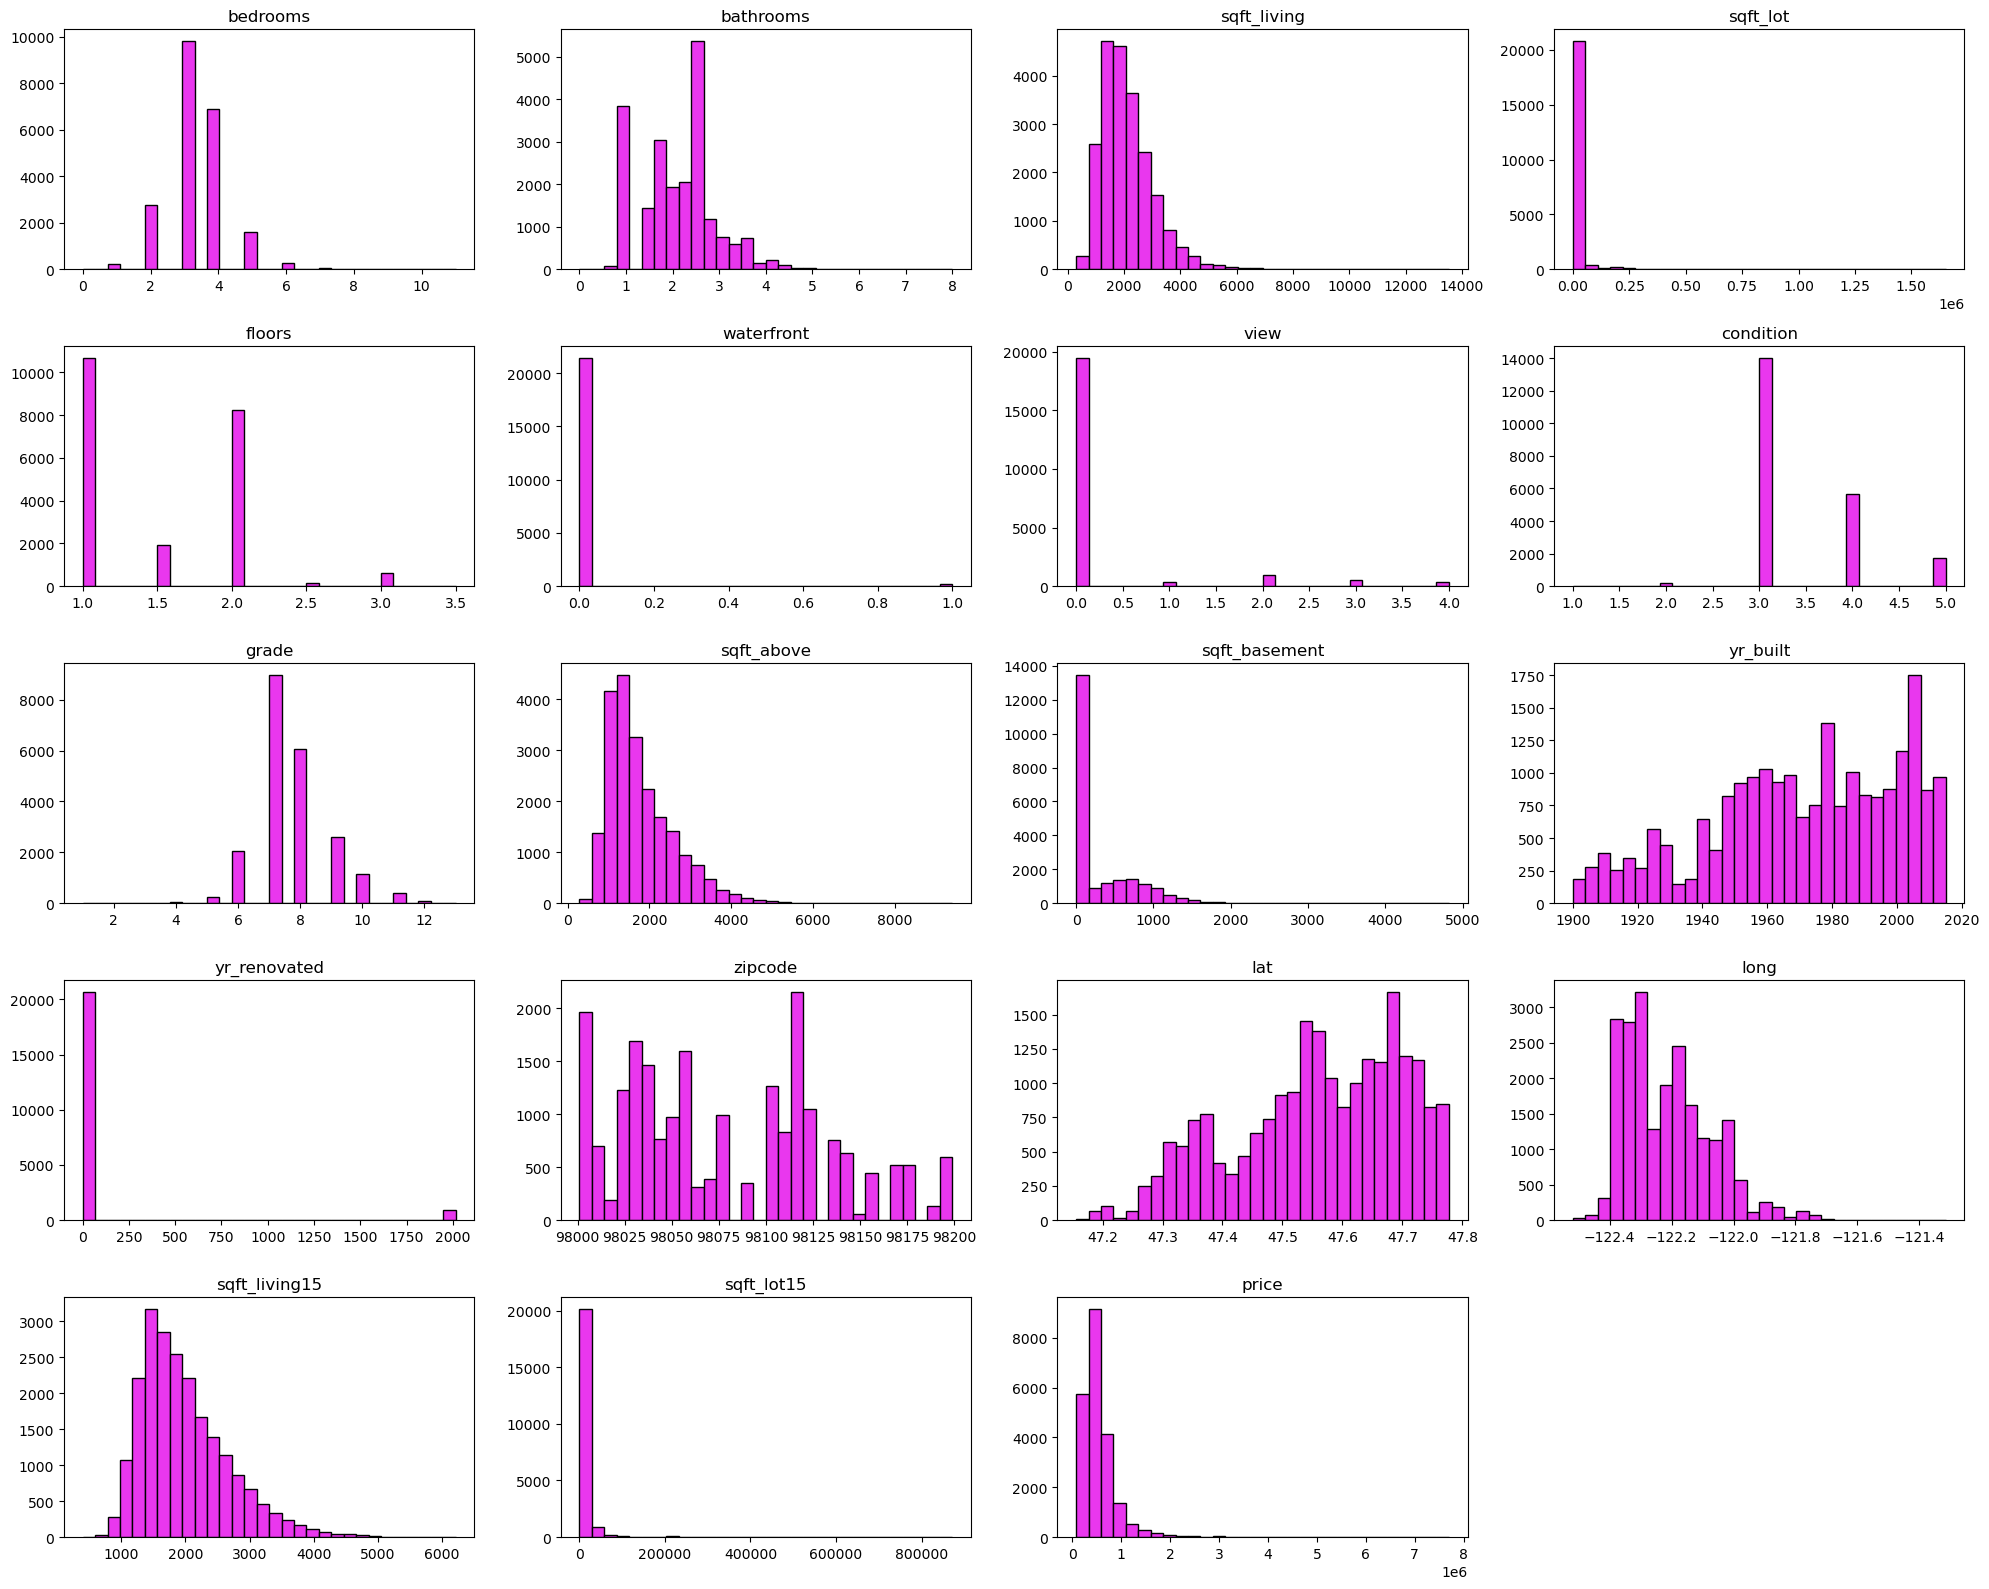

In [52]:
# histogram for all columns apart from date (and "id" which was set as index)

color = '#e937ee'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num_all.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num_all.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num_all.columns[i])

plt.tight_layout()
plt.show()

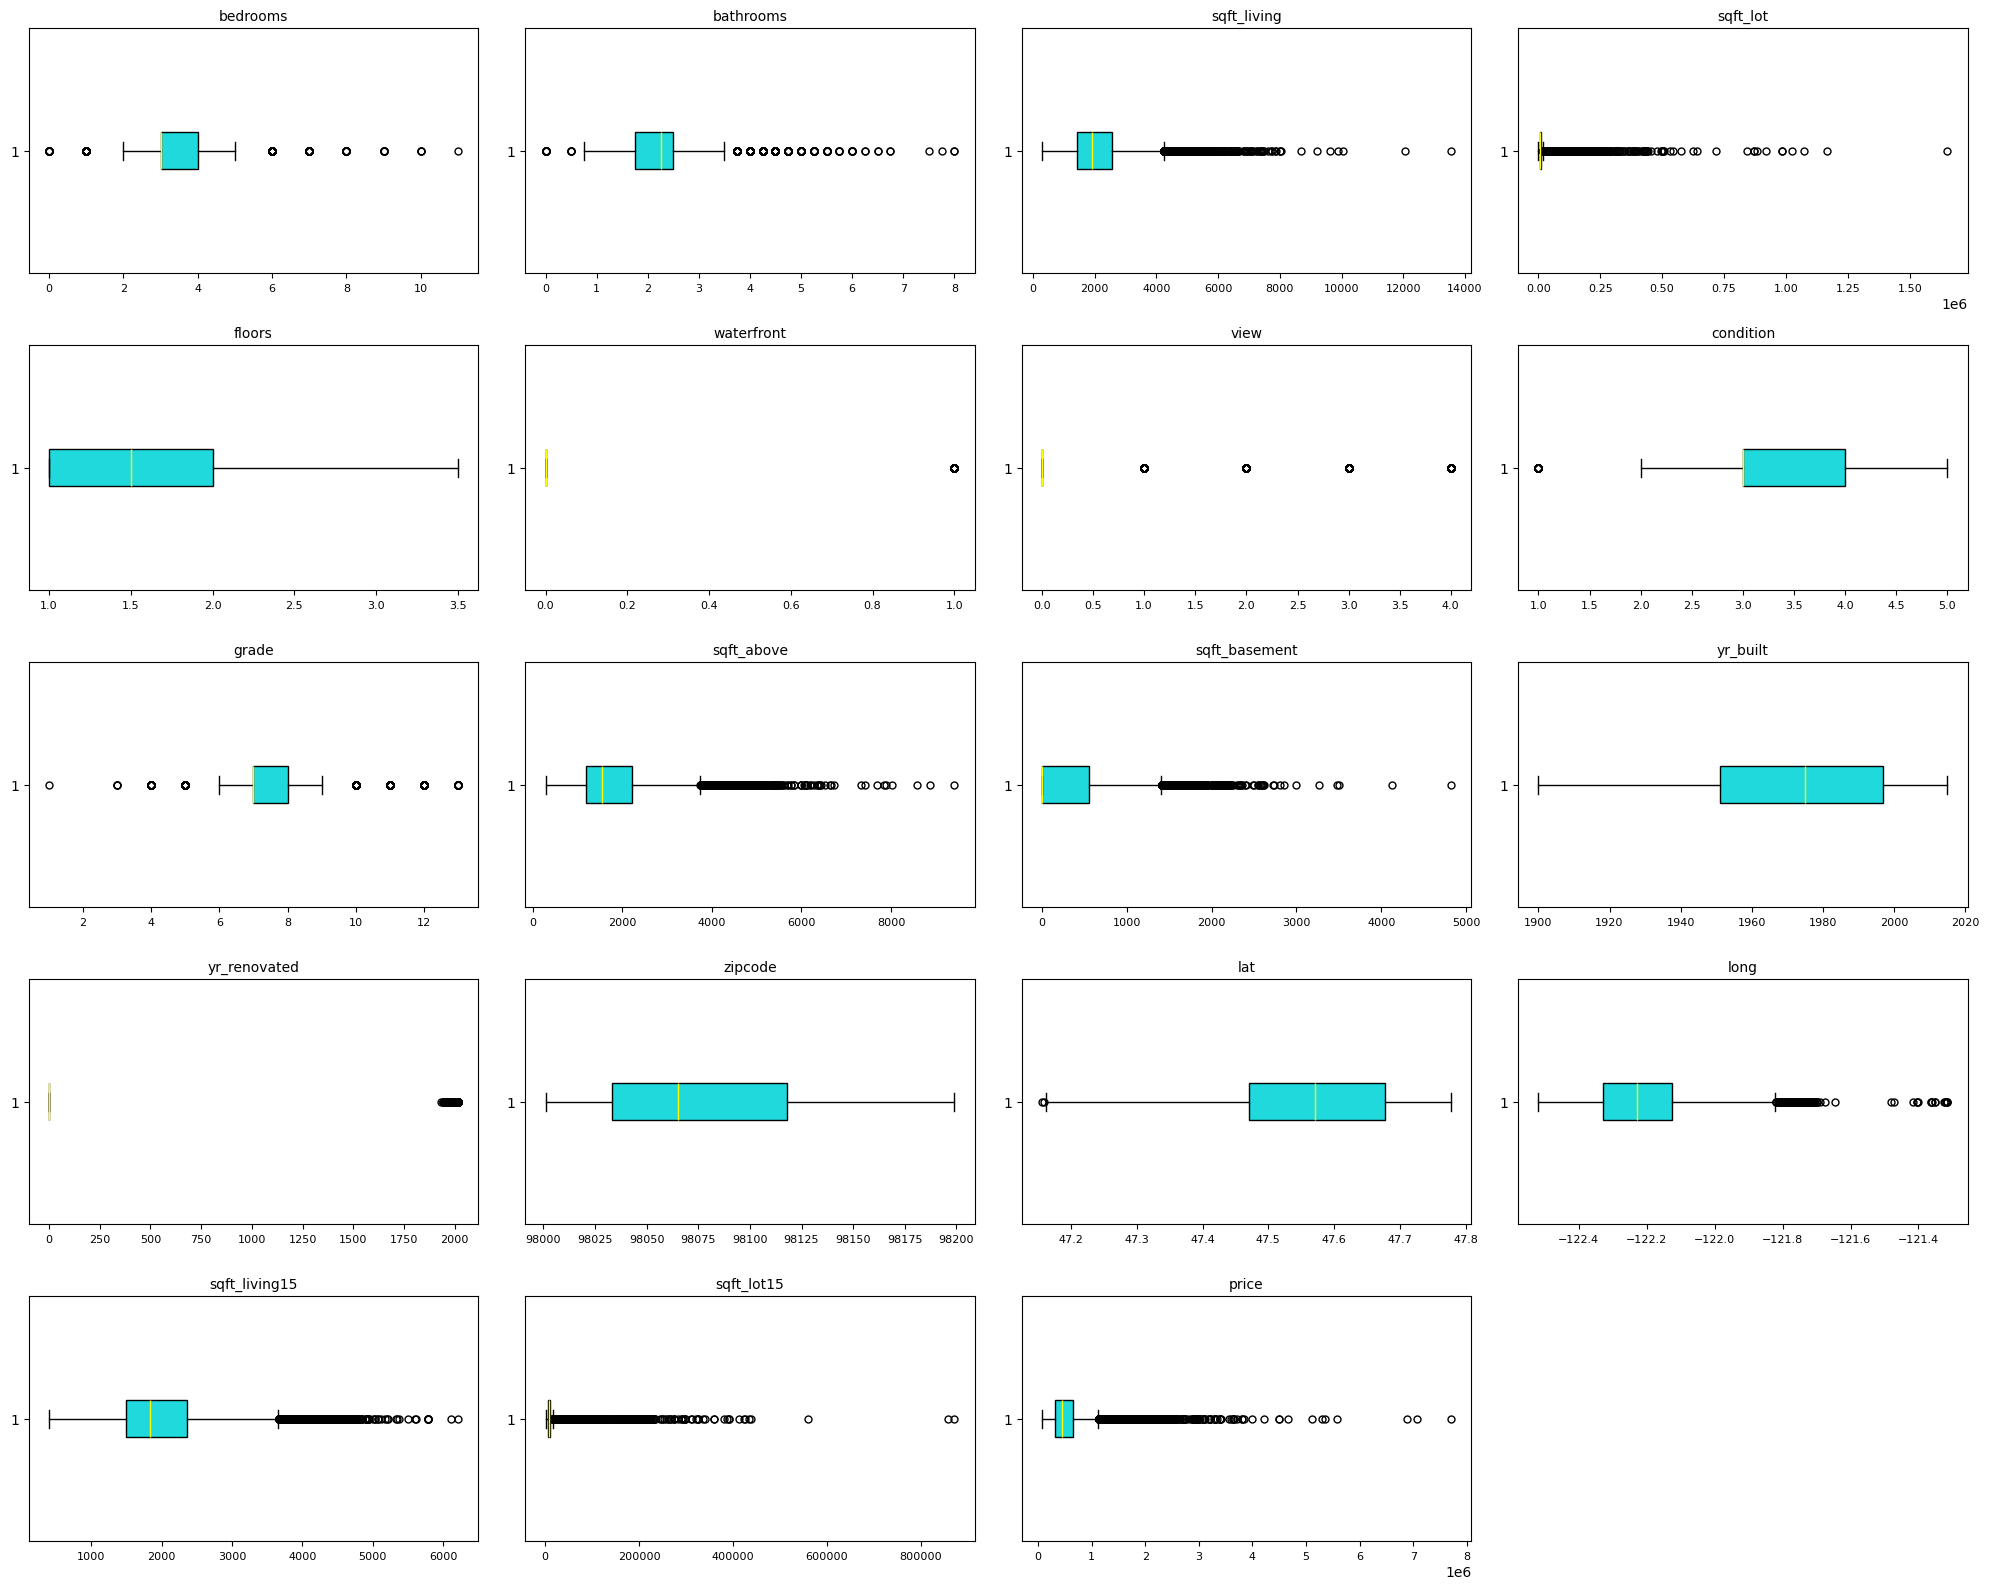

In [53]:
# boxplots for all columns apart from date

color = '#1fd9dd'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num_all.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num_all.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num_all.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #ec1139;">Conclusions from Visualizations</h3>

***Impressions from the Diagramms***

The diagrams support our findings from before. There are four **discrete numerical** variables:

- Bedrooms
- Bathrooms
- Floors
- View

The four following variables are **categorical**:

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)


**Continuous numerical variables**: Only three **obviously good features** in the very conservative way (tendency towards normal distribution):

*   sqft_living
*   sqft_above
*   sqft_living15
*   lat and long are also okay

Our **target "price"**:

*   Many outliers
*   Very positively skewed

<h2 style="color: #ec1139;">Checking our target "price"</h2>


In [57]:
boston_houses["price"].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

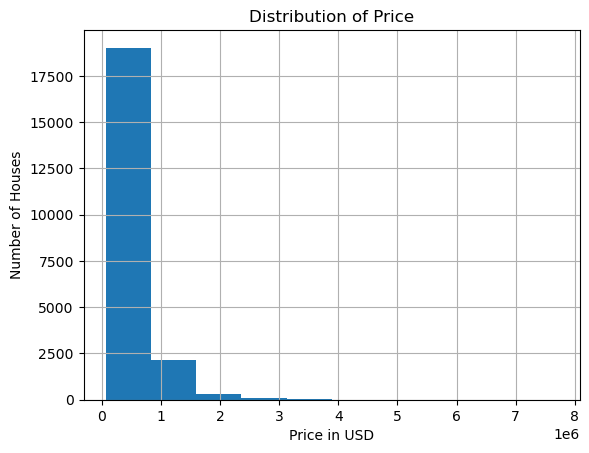

In [58]:
# View price distribution
boston_houses["price"].hist()
plt.xlabel('Price in USD')
plt.ylabel('Number of Houses')
plt.title('Distribution of Price')
plt.show()

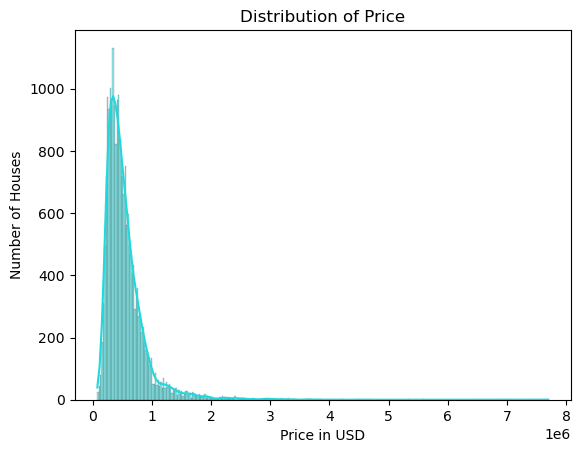

In [59]:
# histplot with kernel density (more bins, so less values on y-axis)
sns.histplot(boston_houses["price"], color=color, kde=True)
plt.xlabel('Price in USD')
plt.ylabel('Number of Houses')
plt.title('Distribution of Price')
plt.show()

In [60]:
# Look at 0.75 percentile
for i in range (75,100):
    q = i/100
    quantile = boston_houses["price"].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.75 percentile: 645000.0
0.76 percentile: 652500.0
0.77 percentile: 665000.0
0.78 percentile: 677500.0
0.79 percentile: 690000.0
0.8 percentile: 700108.0
0.81 percentile: 718000.0
0.82 percentile: 730000.0
0.83 percentile: 749950.0
0.84 percentile: 760000.4
0.85 percentile: 779494.0
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836780.0
0.89 percentile: 859977.2
0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


As noticed before, there are a lot of **outliers in our target**.

As stated in the exercise, we are interested in houses that cost **more than US-D 650,000** which means all the houses above the 0.75 percentile. We will look at this data more closely using a **regression model**.

In [62]:
# storing houses with prices above the 0.75 percentile (= above USD 650,000) in a new df

houses_high_prices = num_all.copy() # making a copy first

houses_high_prices = num_all[num_all['price'] > num_all['price'].quantile(0.75)]
houses_high_prices.price

id
7237550310   1225000.00
1736800520    662500.00
9297300055    650000.00
2524049179   2000000.00
1794500383    937000.00
                ...    
7502800100    679950.00
191100405    1575000.00
7202300110    810000.00
249000205    1537000.00
7936000429   1007500.00
Name: price, Length: 5373, dtype: float64

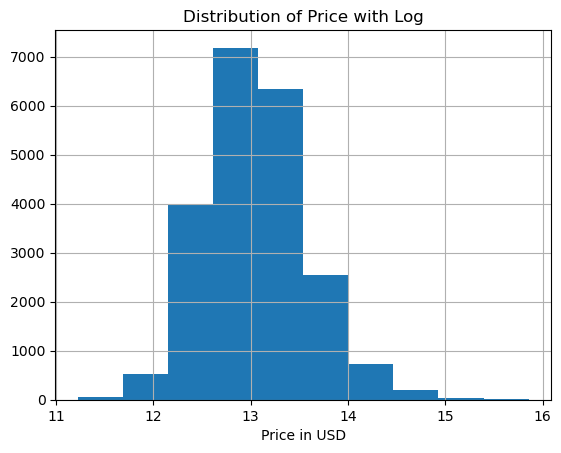

In [63]:
# out of interest: using log and log10 to compress outliers in "price" and to compare both ways

# making a copy first
num_all_price_log = num_all.copy()

# using log
num_all_price_log['price_log'] = np.log(num_all_price_log['price'])

# View price distribution
num_all_price_log["price_log"].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price with Log')
plt.show()

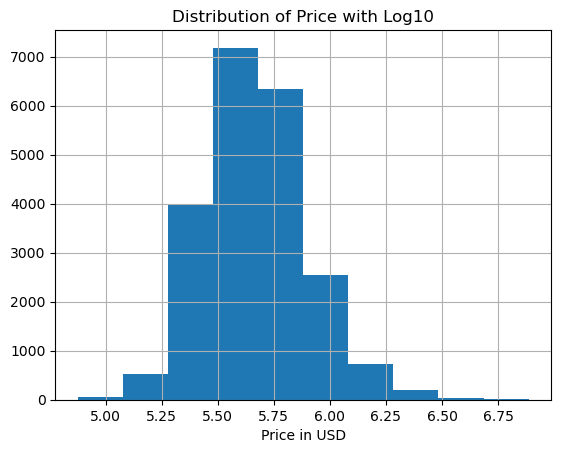

In [64]:
# making a copy first
num_all_price_log10 = num_all.copy()

# using log10
num_all_price_log10['price_log10'] = np.log10(num_all_price_log10['price'])

# View price distribution
num_all_price_log10["price_log10"].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price with Log10')
plt.show()

<h2 style="color: #ec1139;">Correlations</h2>

<h3 style="color: #ec1139;">Correlation: all numerical variables</h3>

We will first check the correlation for all numerical (**continuous and discrete**) features with price and then for all categorical features, using different calculations.

In [68]:
num_all.shape

(21613, 19)

In [69]:
# checking Pearson (linear) correlation with "price" for all numerical columns:

correlation_pearson  = round(num_all.corrwith(num_all["price"]).sort_values(ascending=False), 2)
correlation_pearson

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.32
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
dtype: float64

In [70]:
num_all.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [71]:
# checking Spearman (monotonic relation) just to see if there is anything interesting which we could not see with checking linearity (Pearson)

correlation_spearman = round(num_all.corr(method='spearman')['price'].sort_values(ascending=False), 3)
correlation_spearman

price            1.00
grade            0.66
sqft_living      0.64
sqft_living15    0.57
sqft_above       0.54
bathrooms        0.50
lat              0.46
bedrooms         0.34
floors           0.32
view             0.29
sqft_basement    0.25
waterfront       0.12
yr_built         0.10
yr_renovated     0.10
sqft_lot         0.07
long             0.06
sqft_lot15       0.06
condition        0.02
zipcode         -0.01
Name: price, dtype: float64

❗**Summary for continuous numerical variables:**

**High correlation** (linear) > 0.5:
- sqft_living (0.644)
- sqft_living15 (0.572)
- sqft_above (0.542)

**Medium correlation** (linear) > 0.3
- lat (0.456)

**Low correlation** (linear) > 0.29
- sqft_basement (0.252)
- yr_built (0.102)
- yr_renovated (0.102)
- sqft_lot (0.075)
- long (0.064)
- sqft_lot15 (0.063)



<h3 style="color: #ec1139;">Correlation: only discrete numerical variables</h3>

We will now take out the discrete variables to see if there are different results with different calculations which might be better suited for discrete numerical values:

Discrete features include:
- bathrooms
- view
- bedrooms
- floors


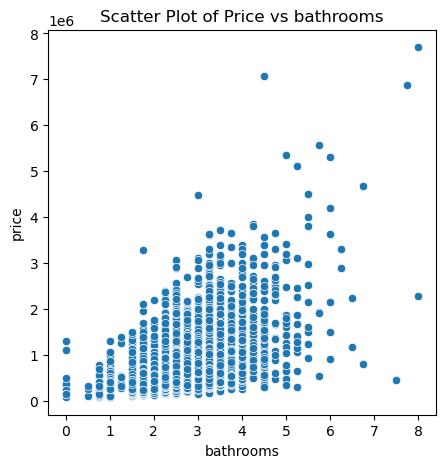

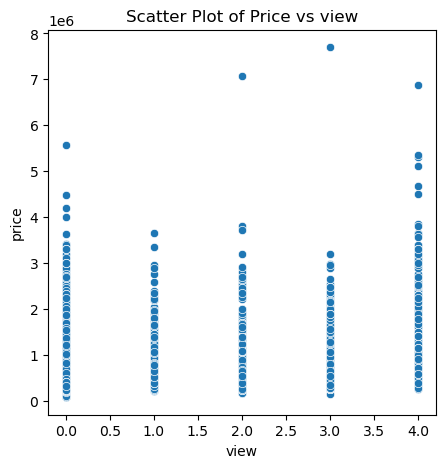

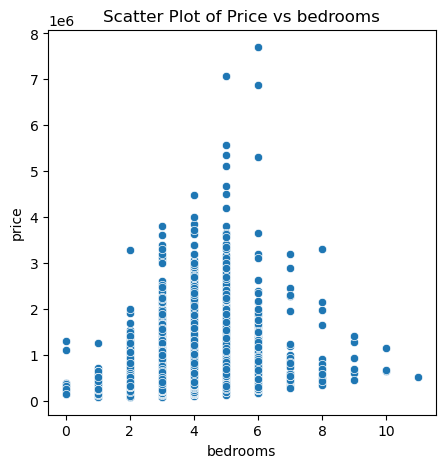

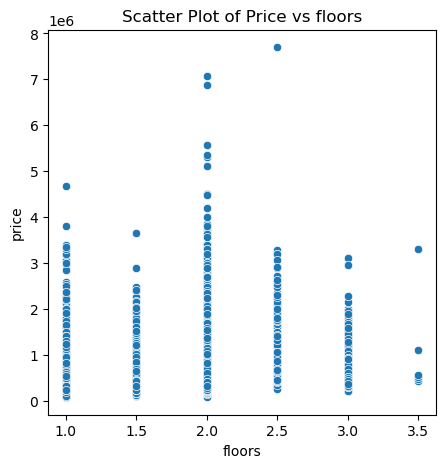

In [75]:
# df for discrete data + "price"
price_features_discrete = num_all[["price", "bathrooms", "view", "bedrooms", "floors"]]

# scatterplot for each features against "price"
for col in price_features_discrete.columns:
  if col != "price":
    plt.figure(figsize=(5,5))
    plt.title("Scatter Plot of Price vs " + col)
    sns.scatterplot(data=price_features_discrete, x=col, y="price")
    plt.show()

**Interpretation Scatter Plots**:

- **Bathrooms**: There seems to be a **positive correlation** between price and bathrooms, there also seems to be a c**ertain degree of linearity** but from 4 or 5 bathrooms upwards, the price increase slows down and the correlation becomes less. There might be **saturation** from this number of bathrooms on.

- **Bedrooms**: Bedrooms show a **certain positive tendency** up until 5 bedrooms (outliers with 6), so like bathrooms (and more clearly), there seems to be a **saturation**. Until that number, the relation shows **some linearity** and after that prices do not increase with the number of bedrooms. The Spearman correlation shows a value a little higher then the Pearson, so the relation might even be a little **more monotonic than linear**.

- **View**: There does **not** seem to be a linear tendency here.

- **Floors**: There is also **no linear tendency** to be seen here. Prices for houses with 2 floors (and outliers in 2.5), prices are a bit higher but the relation between floor and price is not linear.

❗**Summary for discrete numerical variables:**

Regarding the regression model

- **Bathrooms** should be kept as feature in the regression model

- **Bedrooms** should be tested

- **View** and **Floors** can be dropped to try ro improve the regression model

<h3 style="color: #ec1139;">Correlation: only categorical variables</h3>

Different analysis on cat variables

- Condition (ordinal)
- Grade (ordinal)
- Waterfront (nominal)
- Zipcode (nominal)

In [80]:
# df for all categorical variables + "price"
price_features_cat = num_all[["condition", "grade", "waterfront", "zipcode", "price"]]
price_features_cat

,condition,grade,waterfront,zipcode,price
id,,,,,
7129300520,3,7,0,98178,221900.00
6414100192,3,7,0,98125,538000.00
5631500400,3,6,0,98028,180000.00
2487200875,5,7,0,98136,604000.00
1954400510,3,8,0,98074,510000.00
...,...,...,...,...,...
263000018,3,8,0,98103,360000.00
6600060120,3,8,0,98146,400000.00
1523300141,3,7,0,98144,402101.00


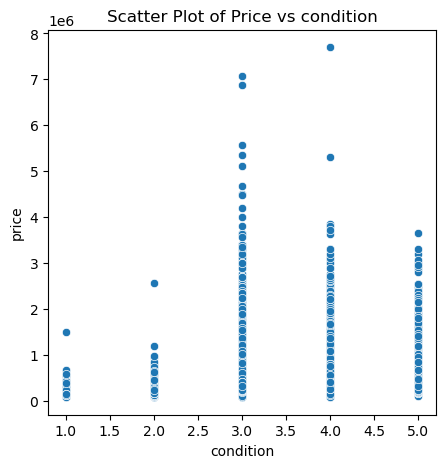

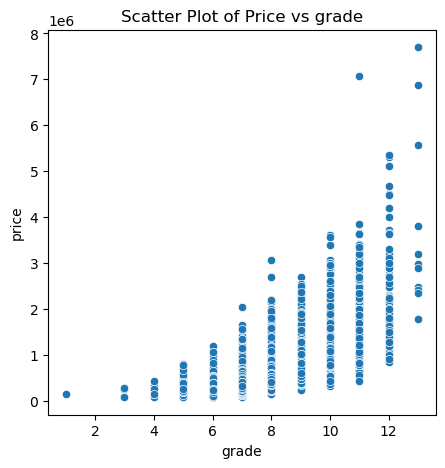

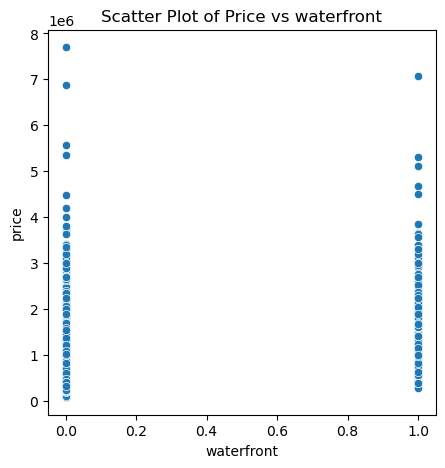

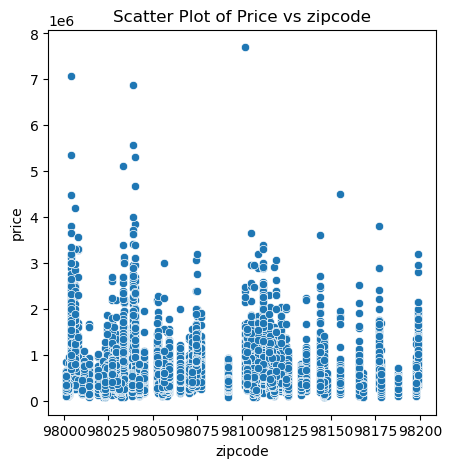

In [81]:
# scatterplot for each features against "price"
for col in price_features_cat.columns:
  if col != "price":
    plt.figure(figsize=(5,5))
    plt.title("Scatter Plot of Price vs " + col)
    sns.scatterplot(data=price_features_cat, x=col, y="price")
    plt.show()

<h3 style="color: #ec1139;">Correlation: only ordinal categorical variables</h3>

In [83]:
# Using Kruskal-Wallis-Test to find out if the different groups in the two ordinal categorial features ("condition" and "grade") have a significant influence on the house price

from scipy.stats import kruskal

# df for all ordinal variables + "price"
price_features_ordinal = price_features_cat[["condition", "grade", "price"]]

# test for "condition"
groups_condition = [price_features_ordinal['price'][price_features_ordinal['condition'] == category] for category in price_features_ordinal['condition'].unique()]
h_stat_condition, p_value_condition = kruskal(*groups_condition)

print(f"Kruskal-Wallis h statistics for condition is: {round(h_stat_condition, 2)} with a p-value of: {p_value_condition}")

# for "grade"
groups_grade = [price_features_ordinal['grade'][price_features_ordinal['grade'] == category] for category in price_features_ordinal['grade'].unique()]
h_stat_grade, p_value_grade = kruskal(*groups_grade)

print(f"Kruskal-Wallis h statistics for grade: {round(h_stat_grade, 2)} with a p-value of: {p_value_grade:.4f}")

Kruskal-Wallis h statistics for condition is: 260.85 with a p-value of: 2.9842751266407488e-55
Kruskal-Wallis h statistics for grade: 21612.0 with a p-value of: 0.0000


**Interpretation of Kruskal-Wallis**:

The test shows for both ordinal variables that they most likely have a **strong influence** on the price of the house. The **extremely low p-values** show significant differences between the house prices in relation to the different groups inside the features.

❓❓❓❓❓

A question which we were not clear about in the end was: Pearson of condition is close to zero, how can we interprete this result of the p-value?

<h2 style="color: #ec1139;">Multicollinearity</h2>


<div class="alert alert-block alert-warning">
Checking for <b>multicollinearity</b>
    
- We don't want multicollinearity, we are checking here
- We do want: High correlations (+ or -) with the target!</div>

In [88]:
# correlation matrix with Pearson (linearity) to help analyse through visualization
correlation_matrix_all = round(num_all.corr(), 2)

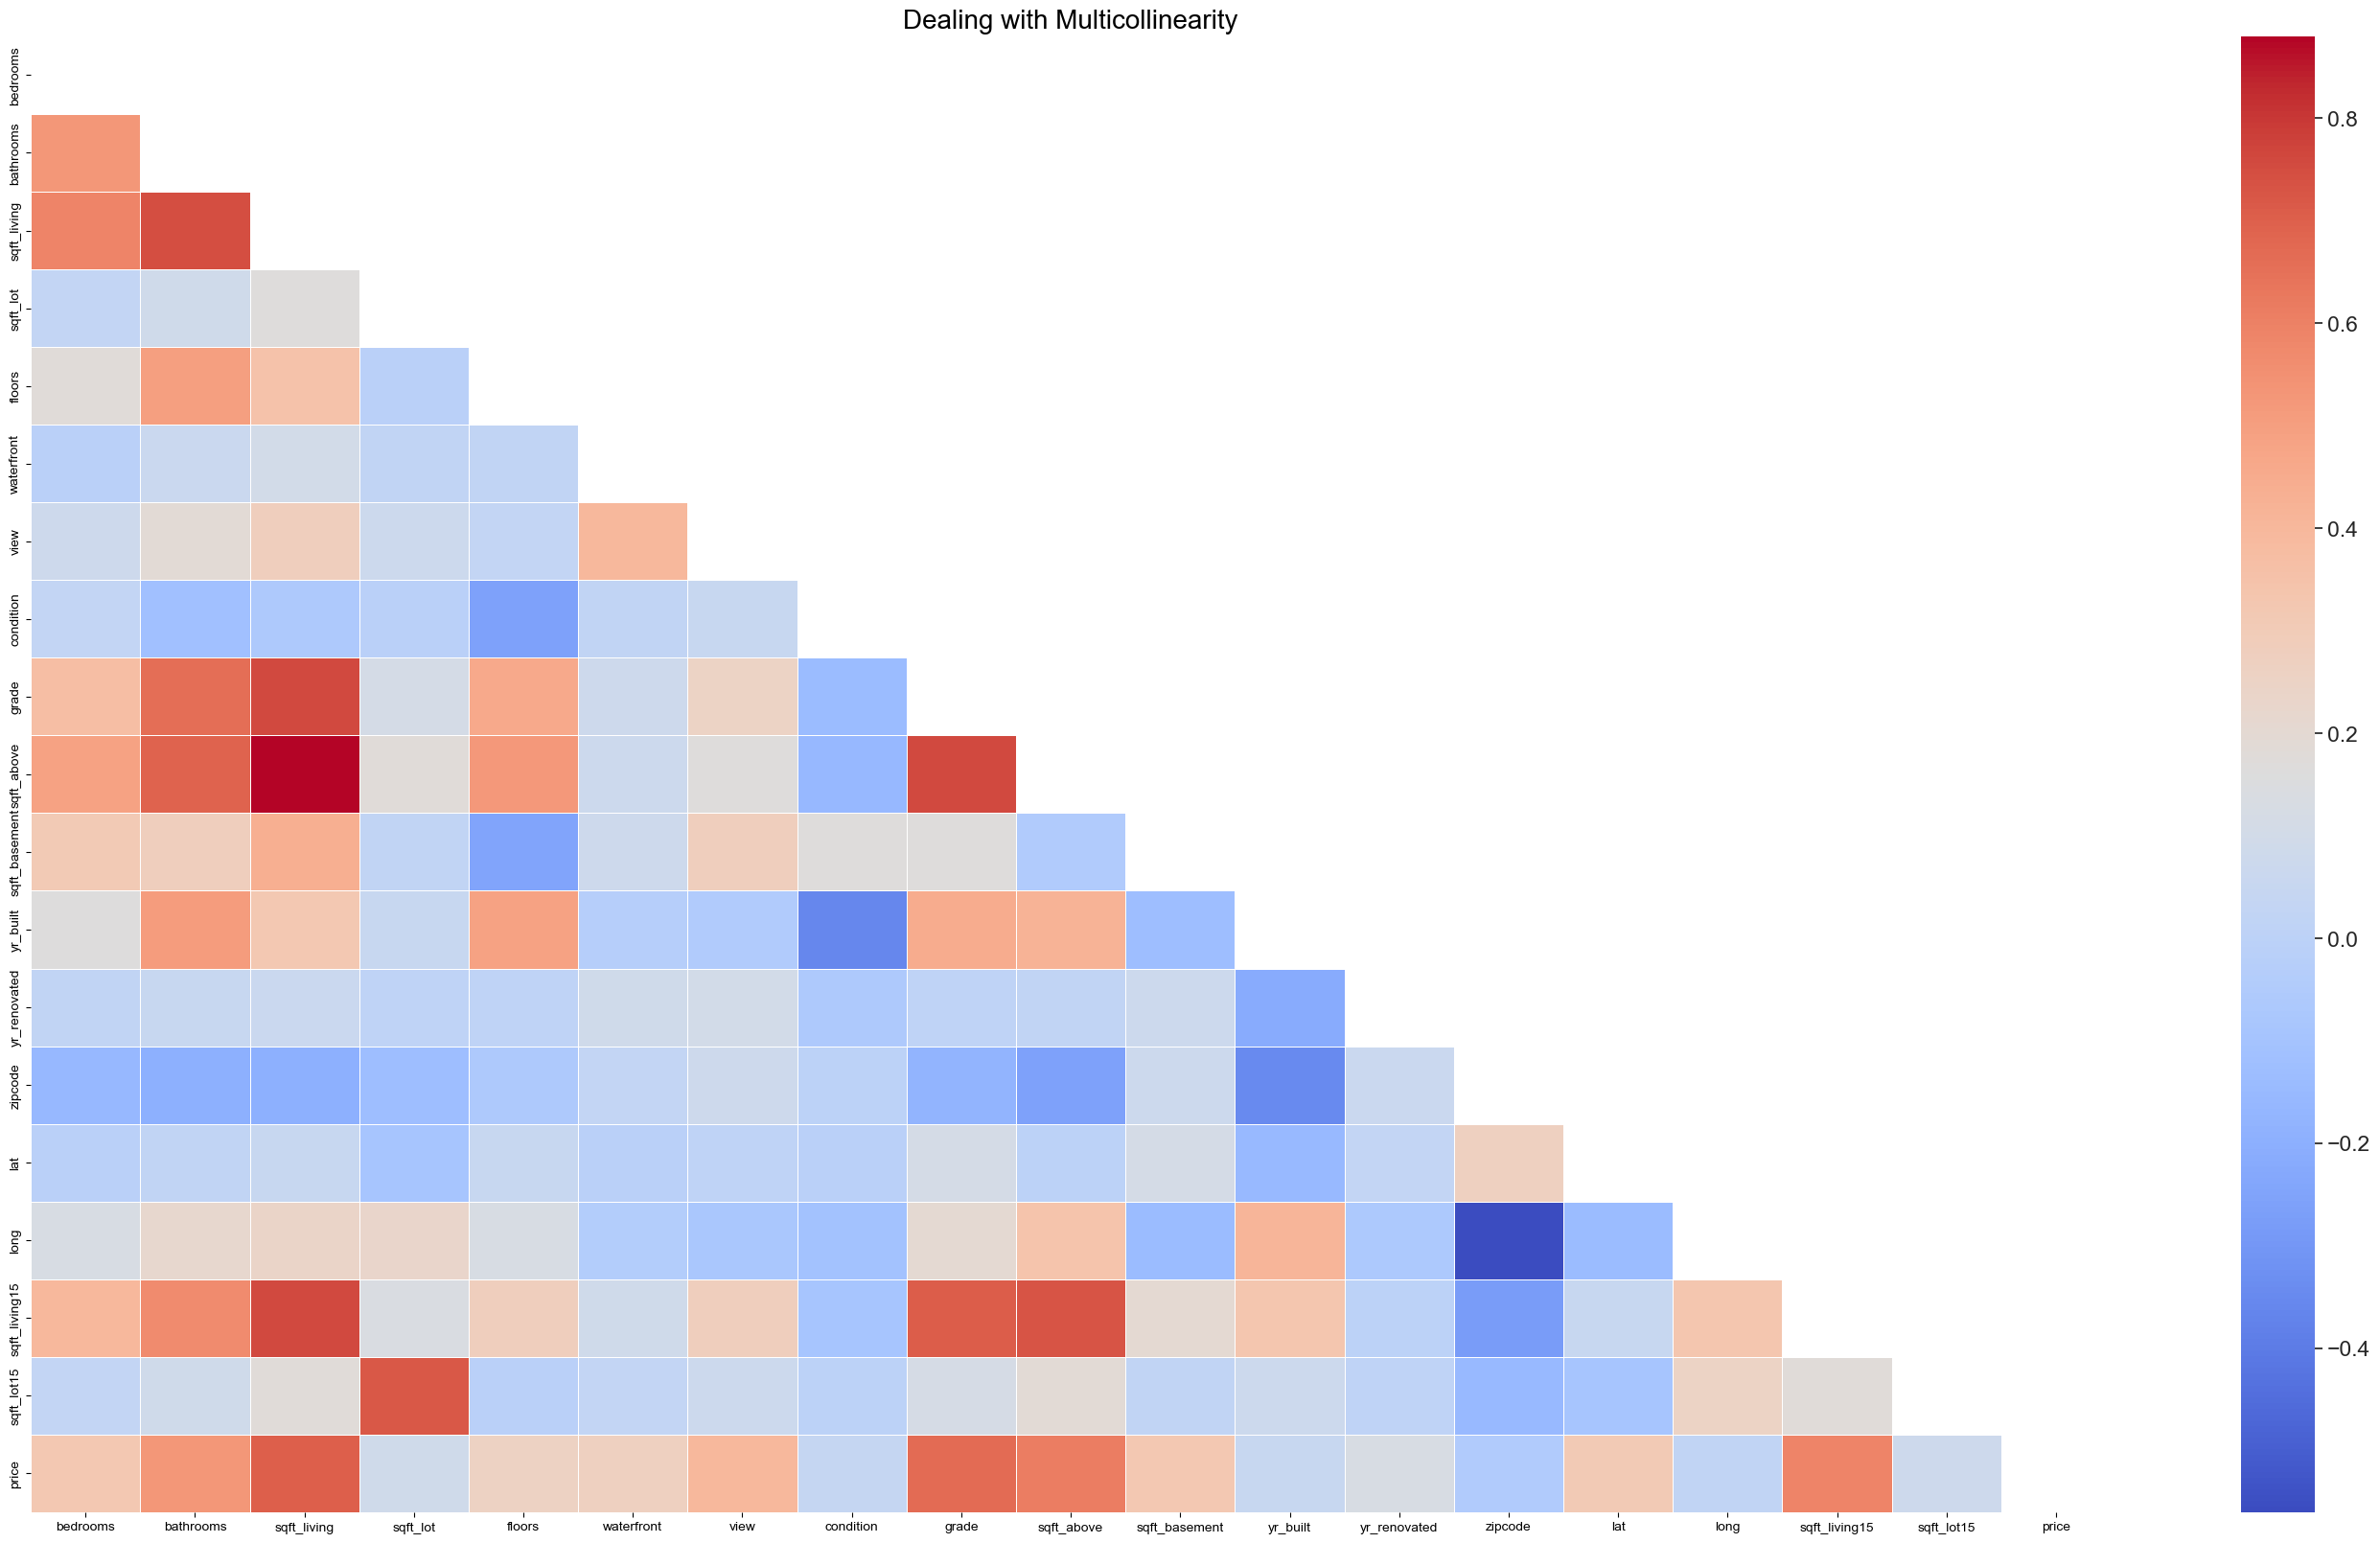

In [89]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(correlation_matrix_all)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 20))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix_all, mask=mask, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

❗**Summary for multicollinearity:**

Features with high multicollinearity:

- **sqft_above**: very high correlation with **sqft_living** (**0.88**) but sqft_living has a higher correlation with the target (0.70 vs. 0.61)

   ▶ **But both have a relatively high correlation**

- **sqft_living15**: very high correlation with **sqft_living** (**0.76**) but sqft_living has a higher correlation with the target (0.70 vs. 0.59)

   ▶ **But both have a relatively high correlation**

- **grade**: very high correlation with **sqft_living** (**0.76**) but sqft_living has a higher correlation with the target (0.70 vs. 0.67)

   ▶ **BUT ONLY VERY SLIGHTLY AND BOTH SHOW HIGH CORRELATION**

- **bathrooms**: very high correlation with **sqft_living** (**0.75**) but sqft_living has a higher correlation with the target (0.70 vs. 0.53)

   ▶ **And we did see that bathrooms up until a certain number seems to have a tendency to a linear relation to the target**

- **sqft_lot15**: very high correlation with **sqft_lot** (0.72) but sqft_lot has a higher correlation with the target (0.09 vs. 0.08)
  
   ▶ **BUT BOTH HAVE VERY LOW CORRELATION WITH THE TARGET**

<h2 style="color: #ec1139;">Some special EDA on selected variables</h2>

We want to gain some deeper insights on specific columns using EDA. This is to see their individual impact on the variable "price".

Therefore, we will look at three different questions:

1. Subset "duplicates" (of "id")

2. Nominal binary variable "waterfront" (here we also want to check if we should include the feature in the regression model or not)

<h3 style="color: #ec1139;">1. Subset "duplicates" (of "id")</h3>

⏰ ... unfortunately, we did not have time for this but it would be interesting

<h3 style="color: #ec1139;">3. Nominal binary variable "**waterfront**"</h3>




In [95]:
round(len(num_all[num_all['waterfront'] == 1])/len(num_all)*100, 2)

0.75

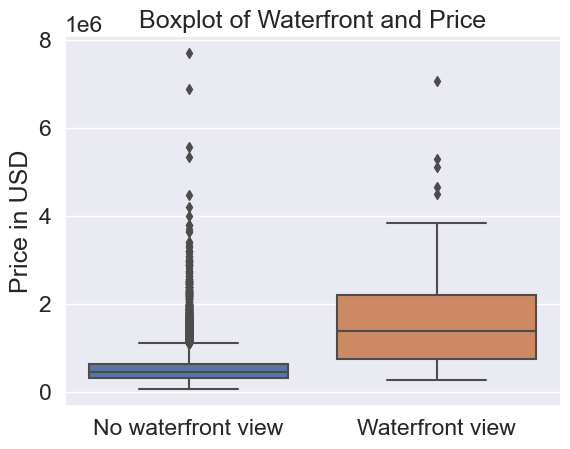

In [96]:
# Plot boxplot of waterfront feature
sns.boxplot(x = num_all['waterfront'], y = num_all['price'])
plt.title("Boxplot of Waterfront and Price")
plt.ylabel("Price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No waterfront view', 'Waterfront view'))
plt.show()

In [97]:
waterfront_price_mean = num_all[num_all['waterfront'] == 1]['price'].mean()
no_waterfront_price_mean = num_all[num_all['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfront_price_mean,2)}")
print(f"The mean house price for a house with no waterfront view is USD {round(no_waterfront_price_mean,2)}")

The mean house price for a house with waterfront view is USD 1661876.02
The mean house price for a house with no waterfront view is USD 531563.6


❗**Summary of waterfront**:

The **mean price** for a house **with a waterfront** view is **more than three times** the price than for houses **without a waterfront** view.

But **only 0.75 percent** of all sold houses **have a waterfront** view, so there is only a few datapoints for this analysis.

<h1 style="color: #e3db24;">04 | Data Processing for Feature Set 1</h1>

<h3 style="color: #ec1139;">Feature Set 1: All Features with Linear, Ridge and Gradient Boosting Regression</h3>

We will first create a **baseline model** in which we include **every feature** given to us (Feature Set 1). We will use a **Linear Regression** for this even though some of our features only show very low linearity with the target.

After that, we will compare the same set of features in a **Ridge Regression** which might be more suitable for our data because it is more robust against **multicollinearity**.

As a third model, we will use **XGBoost** for a **Gradient Boosting Regression** because it is more efficient for **non-linear** and **categorial** data. It is more prone to overfitting though, therefore, we will look closely at the results.

As a fourth and final model, we will use **Random Forest** because it is **similarly strong as XGBoost** regarding non-linear, non-normally distributed data and outliers, but **less prone to overfitting**.

**Outlook**:

After comparing the results of these four models, we will then **select different sets of features** and also to do some **feature engineering** to try to **improve the model**.

**Interpreting the Metrics**:

**R²** (/coefficient of determination): Measures how well the predictions fit the actual data/ how much of the variance is explained. Ranges between 0-1 (i.e. 0.85: 85% of the model is explained).

**MAE** (Mean Absolute Error): The average of the absolute differences between predictions and actual values. **Same scale as the target**. **Not very sensitive to outliers**.

**MSE** (Mean Squared Error): The average of the squared differences between predictions and actual values. **NOT the same scale**. **Penalizes outliers**.

**RMSE** (Root Mean Squared Error)  (2 -> MSE): represents the error in the same units as the original data. **Same scale** as target, **penalizes outliers**.

<h2 style="color: #ec1139;">X-Y Split for Feature Set 1</h2>

In [103]:
feature_set_1 = num_all.copy()

In [104]:
X = feature_set_1.drop("price", axis=1)
y = feature_set_1["price"]

<h1 style="color: #e3db24;">05 | Modeling for Feature Set 1</h1>

<h2 style="color: #ec1139;">Train-Test Split for Feature Set 1</h2>

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
print(f'100% of our data: {len(feature_set_1)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h2 style="color: #ec1139;">Selecting the Model: Linear Regression</h2>

In [110]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Model Validation**

In [112]:
# Make predictions on the test dataset
predictions_linear_1 = model.predict(X_test)
predictions_linear_1

array([ 455598.86439844,  744461.18142464, 1242378.50409811, ...,
        376108.32821159,  814839.6793663 ,  579823.66341833])

In [113]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df1 = pd.DataFrame({"actual":y_test,"pred":predictions_linear_1})
eval_df1["pred"] = eval_df1["pred"].round(2)
eval_df1

,actual,pred
id,,
2591820310,365000.00,455598.86
7974200820,865000.00,744461.18
7701450110,1038000.00,1242378.50
9522300010,1490000.00,1671752.16
9510861140,711000.00,739522.87
...,...,...
1402660150,412000.00,525213.45
2301400325,760000.00,658742.34
6150200005,410500.00,376108.33


In [114]:
# show the difference between actual and prediction
eval_df1["diff"] = abs(eval_df1["actual"]-eval_df1["pred"])
eval_df1.head()

,actual,pred,diff
id,,,
2591820310,365000.00,455598.86,90598.86
7974200820,865000.00,744461.18,120538.82
7701450110,1038000.00,1242378.50,204378.50
9522300010,1490000.00,1671752.16,181752.16
9510861140,711000.00,739522.87,28522.87


**Metrics**

In [116]:
r2_LG_1 = r2_score(y_test, predictions_linear_1)
RMSE_LG_1 = mean_squared_error(y_test, predictions_linear_1, squared=False)
MSE_LG_1 = mean_squared_error(y_test, predictions_linear_1)
MAE_LG_1 = mean_absolute_error(y_test, predictions_linear_1)

In [117]:
#Printing the results
print("Linear Regression with Feature Set 1")
print("R2 = ", round(r2_LG_1, 2))
print("RMSE = ", round(RMSE_LG_1, 2))
print("MSE = ", round(MSE_LG_1, 2))
print("MAE = ", round(MAE_LG_1, 2))

Linear Regression with Feature Set 1
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.49
MAE =  127569.11


<h2 style="color: #ec1139;">Selecting the Model: Ridge Regression</h2>

In [119]:
from sklearn.linear_model import Ridge

In [120]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

**Model Validation**

In [122]:
predictions_ridge_1 = ridge.predict(X_test)

In [123]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_ridge_1})
eval_df2["pred"] = eval_df2["pred"].round(2)
eval_df2.head()

,actual,pred
id,,
2591820310,365000.00,455828.31
7974200820,865000.00,744076.56
7701450110,1038000.00,1242734.14
9522300010,1490000.00,1671838.93
9510861140,711000.00,739349.00


In [124]:
eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.sample(5)

,actual,pred,dif
id,,,
3326069026,600000.00,599055.76,944.24
9206700190,713900.00,816348.49,102448.49
9285800275,835000.00,915055.30,80055.30
2258500045,317500.00,370915.98,53415.98
724069070,950000.00,913022.65,36977.35


**Metrics**

In [126]:
r2_RR_1 = r2_score(y_test, predictions_ridge_1)
RMSE_RR_1 = mean_squared_error(y_test, predictions_ridge_1, squared=False)
MSE_RR_1 = mean_squared_error(y_test, predictions_ridge_1)
MAE_RR_1 = mean_absolute_error(y_test, predictions_ridge_1)

In [127]:
#Printing the results
print("Ridge Regression with Feature Set 1")
print("R2 = ", round(r2_RR_1, 2))
print("RMSE = ", round(RMSE_RR_1, 2))
print("MSE = ", round(MSE_RR_1, 2))
print("MAE = ", round(MAE_RR_1, 2))

Ridge Regression with Feature Set 1
R2 =  0.7
RMSE =  208308.84
MSE =  43392570958.39
MAE =  127562.64


<h2 style="color: #ec1139;">Selecting the Model: XGboost </h2>

In [129]:
import xgboost as xgb

In [130]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model Validation**

In [132]:
predictions_xgb_1 = xgbr.predict(X_test)

In [133]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df3 = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_1})
eval_df3["pred"] = eval_df3["pred"].round(2)
eval_df3.head()

,actual,pred
id,,
2591820310,365000.00,439345.03
7974200820,865000.00,874589.81
7701450110,1038000.00,1148093.75
9522300010,1490000.00,2626800.25
9510861140,711000.00,754779.12


In [134]:
eval_df3["dif"] = abs(eval_df3["actual"]-eval_df3["pred"])
eval_df3.sample(5)

,actual,pred,dif
id,,,
8155820110,355000.00,281765.16,73234.84
7520000695,151100.00,204936.23,53836.23
6071700020,515000.00,536646.75,21646.75
6326000205,290000.00,414624.91,124624.91
3904980360,495000.00,533592.81,38592.81


**Metrics**

In [136]:
r2_XG_1 = r2_score(y_test, predictions_xgb_1)
RMSE_XG_1 = mean_squared_error(y_test, predictions_xgb_1, squared=False)
MSE_XG_1 = mean_squared_error(y_test, predictions_xgb_1)
MAE_XG_1 = mean_absolute_error(y_test, predictions_xgb_1)

In [137]:
#Printing the results
print("XGBoost with Feature Set 1")
print("R2 = ", round(r2_XG_1, 2))
print("RMSE = ", round(RMSE_XG_1, 2))
print("MSE = ", round(MSE_XG_1, 2))
print("MAE = ", round(MAE_XG_1, 2))

XGBoost with Feature Set 1
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


<h2 style="color: #ec1139;">Selecting the Model: Random Forest </h2>

In [139]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions_rf = rfr.predict(X_test)

# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_dfRF = pd.DataFrame({"actual":y_test,"pred":predictions_rf})
eval_dfRF["pred"] = eval_dfRF["pred"].round(2)

eval_dfRF["dif"] = abs(eval_dfRF["actual"]-eval_dfRF["pred"])
eval_dfRF.sample(5)

,actual,pred,dif
id,,,
1591600506,479000.00,398664.44,80335.56
9520900230,642860.00,611206.15,31653.85
7701960210,875000.00,828526.93,46473.07
1483300430,554000.00,421326.23,132673.77
2130701535,279900.00,335712.47,55812.47


In [140]:
r2_RF_1 = r2_score(y_test, predictions_rf)
RMSE_RF_1 = mean_squared_error(y_test, predictions_rf, squared=False)
MSE_RF_1 = mean_squared_error(y_test, predictions_rf)
MAE_RF_1 = mean_absolute_error(y_test, predictions_rf)

#Printing the results
print("Random Forest with Feature Set 1")
print("R2 = ", round(r2_RF_1, 2))
print("RMSE = ", round(RMSE_RF_1, 2))
print("MSE = ", round(MSE_RF_1, 2))
print("MAE = ", round(MAE_RF_1, 2))

Random Forest with Feature Set 1
R2 =  0.85
RMSE =  145334.79
MSE =  21122201496.49
MAE =  73674.07


<h2 style="color: #ec1139;">Comparing the 4 Models (based on Feature Set 1) </h2>

In [142]:
print("Metrics for Feature Set 1")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_1, 2))
print("RMSE = ", round(RMSE_LG_1, 2))
print("MSE = ", round(MSE_LG_1, 2))
print("MAE = ", round(MAE_LG_1, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_1, 2))
print("RMSE = ", round(RMSE_RR_1, 2))
print("MSE = ", round(MSE_RR_1, 2))
print("MAE = ", round(MAE_RR_1, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_1, 2))
print("RMSE = ", round(RMSE_XG_1, 2))
print("MSE = ", round(MSE_XG_1, 2))
print("MAE = ", round(MAE_XG_1, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_1, 2))
print("RMSE = ", round(RMSE_RF_1, 2))
print("MSE = ", round(MSE_RF_1, 2))
print("MAE = ", round(MAE_RF_1, 2))

Metrics for Feature Set 1

----------Linear Regression--------------
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.49
MAE =  127569.11
-----------Ridge--------------
R2 =  0.7
RMSE =  208308.84
MSE =  43392570958.39
MAE =  127562.64
-----------XGBoost--------------
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84
-----------Random Forest--------------
R2 =  0.85
RMSE =  145334.79
MSE =  21122201496.49
MAE =  73674.07


In [143]:
print(f"The mean price for a house is: {round(num_all.price.mean(), 2)}")
print(f"The median price for a house is: {round(num_all.price.median(), 2)}")

The mean price for a house is: 540088.14
The median price for a house is: 450000.0


❓❗**Interpretation of Metrics and Evaluation of Models (Feature Set 1)**:

- RSME always (a lot) higher than MAE (almost double): points to many **outliers** in the data.

- Linear and Ridge are both based on the assumption of linearity. Yet they show quite **high explanatory power** (R²).

- **XGBoost** and **Random Forest** perform really well. But even this very good model shows quite high error rates: **XGBoost**: MAE with over 70,000 USD is 13% difference to mean price; RSME (which penalizes outliers more than MAE) with almost 140,000 USD shows even around 25% difference to the mean price of a house.


<h1 style="color: #e3db24;">06 | Improving the Model</h1>

<h2 style="color: #ec1139;">Approach 1: Only Features with High Correlation with the Target</h2>

There is enough grounds here to try to **improve the model**. We suspect that the explanatory power might improve by **selecting less predictors** which is what we will try first.

For the next set of features, we will eliminate all the variables which have a low correlation with the target "price". We will **NOT** yet erase variables based solely on the ground of **multicollinearity** as among these are such with a high bilateral predictive power.

**Set of Features 2:**

We will **drop**:
- lat
- sqft_basement
- yr_built
- yr_renovated
- sqft_lot
- long
- sqft_lot15
- view
- floors
- condition

We will **keep**:
- sqft_living
- sqft_living15
- sqft_above
- bathrooms
- bedrooms
- grade
- waterfront
- zipcode

In [148]:
feature_set_2 = num_all[["price", "sqft_living", "sqft_living15", "sqft_above", "bathrooms", "bedrooms", "grade", "waterfront", "zipcode"]]
feature_set_2

,price,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,grade,waterfront,zipcode
id,,,,,,,,,
7129300520,221900.00,1180,1340,1180,1.00,3,7,0,98178
6414100192,538000.00,2570,1690,2170,2.25,3,7,0,98125
5631500400,180000.00,770,2720,770,1.00,2,6,0,98028
2487200875,604000.00,1960,1360,1050,3.00,4,7,0,98136
1954400510,510000.00,1680,1800,1680,2.00,3,8,0,98074
...,...,...,...,...,...,...,...,...,...
263000018,360000.00,1530,1530,1530,2.50,3,8,0,98103
6600060120,400000.00,2310,1830,2310,2.50,4,8,0,98146
1523300141,402101.00,1020,1020,1020,0.75,2,7,0,98144


<h3 style="color: #ec1139;">X-y Split for for Feature Set 2</h3>

In [150]:
X_feature_set_2 = feature_set_2.drop("price", axis=1)
y_feature_set_2 = feature_set_2["price"]

<h3 style="color: #ec1139;">Train-Test Split for Feature Set 2</h3>

In [152]:
X_train_feature_set_2, X_test_feature_set_2, y_train_feature_set_2, y_test_feature_set_2 = train_test_split(X_feature_set_2, y_feature_set_2, test_size=0.3, random_state=42)

In [153]:
print(f'100% of our data: {len(feature_set_2)}.')
print(f'70% for training data: {len(X_train_feature_set_2)}.')
print(f'30% for test data: {len(X_test_feature_set_2)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec1139;">Linear Regression Feature Set 2</h3>



In [155]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_2,y_train_feature_set_2)

LinearRegression()

In [156]:
# Make predictions on the test dataset
predictions_linear_2 = model.predict(X_test_feature_set_2)
predictions_linear_2

array([ 523002.53130772,  727505.54699197, 1139864.01265264, ...,
        318816.5953487 ,  722405.46050168,  616851.03391103])

In [157]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df4 = pd.DataFrame({"actual":y_test_feature_set_2,"pred":predictions_linear_2})
eval_df4["pred"] = eval_df4["pred"].round(2)
eval_df4

,actual,pred
id,,
2591820310,365000.00,523002.53
7974200820,865000.00,727505.55
7701450110,1038000.00,1139864.01
9522300010,1490000.00,1429809.50
9510861140,711000.00,736120.15
...,...,...
1402660150,412000.00,577065.66
2301400325,760000.00,483981.30
6150200005,410500.00,318816.60


In [158]:
# show the difference between actual and prediction
eval_df4["diff"] = abs(eval_df4["actual"]-eval_df4["pred"])
eval_df4.head()

,actual,pred,diff
id,,,
2591820310,365000.00,523002.53,158002.53
7974200820,865000.00,727505.55,137494.45
7701450110,1038000.00,1139864.01,101864.01
9522300010,1490000.00,1429809.50,60190.50
9510861140,711000.00,736120.15,25120.15


In [159]:
r2_LG_2 = r2_score(y_test_feature_set_2, predictions_linear_2)
RMSE_LG_2 = mean_squared_error(y_test_feature_set_2, predictions_linear_2, squared=False)
MSE_LG_2 = mean_squared_error(y_test_feature_set_2, predictions_linear_2)
MAE_LG_2 = mean_absolute_error(y_test_feature_set_2, predictions_linear_2)

In [160]:
#Printing the results
print("Linear Regression with Feature Set 2")
print("R2 = ", round(r2_LG_2, 2))
print("RMSE = ", round(RMSE_LG_2, 2))
print("MSE = ", round(MSE_LG_2, 2))
print("MAE = ", round(MAE_LG_2, 2))

Linear Regression with Feature Set 2
R2 =  0.59
RMSE =  243246.11
MSE =  59168670001.5
MAE =  158482.99


<h3 style="color: #ec1139;">Ridge Regression Feature Set 2</h3>

In [162]:
ridge = Ridge()
ridge.fit(X_train_feature_set_2,y_train_feature_set_2)

Ridge()

In [163]:
predictions_ridge_2 = ridge.predict(X_test_feature_set_2)

In [164]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df5 = pd.DataFrame({"actual":y_test_feature_set_2,"pred":predictions_ridge_2})
eval_df5["pred"] = eval_df5["pred"].round(2)
eval_df5.head()

,actual,pred
id,,
2591820310,365000.00,522986.84
7974200820,865000.00,727593.33
7701450110,1038000.00,1139944.51
9522300010,1490000.00,1430044.35
9510861140,711000.00,736187.63


In [165]:
eval_df5["dif"] = abs(eval_df5["actual"]-eval_df5["pred"])
eval_df5.sample(5)

,actual,pred,dif
id,,,
2922069134,585000.00,489542.38,95457.62
2540820010,750000.00,658574.97,91425.03
5466400550,210000.00,305369.81,95369.81
8572900275,286000.00,38276.07,247723.93
7812801785,221347.00,354224.69,132877.69


In [166]:
r2_RR_2 = r2_score(y_test_feature_set_2, predictions_ridge_2)
RMSE_RR_2 = mean_squared_error(y_test_feature_set_2, predictions_ridge_2, squared=False)
MSE_RR_2 = mean_squared_error(y_test_feature_set_2, predictions_ridge_2)
MAE_RR_2 = mean_absolute_error(y_test_feature_set_2, predictions_ridge_2)

In [167]:
#Printing the results
print("Ridge Regression with Feature Set 2")
print("R2 = ", round(r2_RR_2, 2))
print("RMSE = ", round(RMSE_RR_2, 2))
print("MSE = ", round(MSE_RR_2, 2))
print("MAE = ", round(MAE_RR_2, 2))

Ridge Regression with Feature Set 2
R2 =  0.59
RMSE =  243265.6
MSE =  59178153740.21
MAE =  158493.79


<h3 style="color: #ec1139;">Gradient Boost Regression with Feature Set 2</h3>

In [169]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_feature_set_2,y_train_feature_set_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [170]:
predictions_xgb_2 = xgbr.predict(X_test_feature_set_2)

In [171]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df6 = pd.DataFrame({"actual":y_test_feature_set_2,"pred":predictions_xgb_2})
eval_df6["pred"] = eval_df6["pred"].round(2)
eval_df6.head()

,actual,pred
id,,
2591820310,365000.00,415039.38
7974200820,865000.00,837860.94
7701450110,1038000.00,1121190.38
9522300010,1490000.00,1462225.88
9510861140,711000.00,732974.06


In [172]:
eval_df6["dif"] = abs(eval_df6["actual"]-eval_df6["pred"])
eval_df6.sample(5)

,actual,pred,dif
id,,,
8649400410,375000.00,433549.28,58549.28
2790410250,615000.00,662460.88,47460.88
1133000036,410000.00,398826.28,11173.72
7636800041,995000.00,1424862.25,429862.25
4053200926,357000.00,451094.62,94094.62


In [173]:
r2_XG_2 = r2_score(y_test_feature_set_2, predictions_xgb_2)
RMSE_XG_2 = mean_squared_error(y_test_feature_set_2, predictions_xgb_2, squared=False)
MSE_XG_2 = mean_squared_error(y_test_feature_set_2, predictions_xgb_2)
MAE_XG_2 = mean_absolute_error(y_test_feature_set_2, predictions_xgb_2)

In [174]:
#Printing the results
print("XGBoost with Feature Set 2")
print("R2 = ", round(r2_XG_2, 2))
print("RMSE = ", round(RMSE_XG_2, 2))
print("MSE = ", round(MSE_XG_2, 2))
print("MAE = ", round(MAE_XG_2, 2))

XGBoost with Feature Set 2
R2 =  0.81
RMSE =  166464.4
MSE =  27710396028.73
MAE =  84395.89


<h3 style="color: #ec1139;">Random Forest Regression with Feature Set 2</h3>

In [176]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_2,y_train_feature_set_2)
predictions_rf_2 = rfr.predict(X_test_feature_set_2)

# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_dfRF2 = pd.DataFrame({"actual":y_test_feature_set_2,"pred":predictions_rf_2})
eval_dfRF2["pred"] = eval_dfRF2["pred"].round(2)

eval_dfRF2["dif"] = abs(eval_dfRF2["actual"]-eval_dfRF2["pred"])
eval_dfRF2.sample(5)

,actual,pred,dif
id,,,
2781260070,388000.00,437905.50,49905.50
1438000440,515805.00,504962.02,10842.98
579000550,440000.00,419493.01,20506.99
546000045,422500.00,436946.17,14446.17
7768800290,855000.00,833587.62,21412.38


In [177]:
r2_RF_2 = r2_score(y_test_feature_set_2, predictions_rf_2)
RMSE_RF_2 = mean_squared_error(y_test_feature_set_2, predictions_rf_2, squared=False)
MSE_RF_2 = mean_squared_error(y_test_feature_set_2, predictions_rf_2)
MAE_RF_2 = mean_absolute_error(y_test_feature_set_2, predictions_rf_2)

#Printing the results
print("Random Forest with Feature Set 2")
print("R2 = ", round(r2_RF_2, 2))
print("RMSE = ", round(RMSE_RF_2, 2))
print("MSE = ", round(MSE_RF_2, 2))
print("MAE = ", round(MAE_RF_2, 2))

Random Forest with Feature Set 2
R2 =  0.79
RMSE =  174339.04
MSE =  30394099665.21
MAE =  89800.44


<h3 style="color: #ec1139;">Comparing the 3 Models (based on Feature Set 2) </h3>

In [179]:
print("Metrics for Feature Set 2")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_2, 2))
print("RMSE = ", round(RMSE_LG_2, 2))
print("MSE = ", round(MSE_LG_2, 2))
print("MAE = ", round(MAE_LG_2, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_2, 2))
print("RMSE = ", round(RMSE_RR_2, 2))
print("MSE = ", round(MSE_RR_2, 2))
print("MAE = ", round(MAE_RR_2, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_2, 2))
print("RMSE = ", round(RMSE_XG_2, 2))
print("MSE = ", round(MSE_XG_2, 2))
print("MAE = ", round(MAE_XG_2, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_2, 2))
print("RMSE = ", round(RMSE_RF_2, 2))
print("MSE = ", round(MSE_RF_2, 2))
print("MAE = ", round(MAE_RF_2, 2))

Metrics for Feature Set 2

----------Linear Regression--------------
R2 =  0.59
RMSE =  243246.11
MSE =  59168670001.5
MAE =  158482.99
-----------Ridge--------------
R2 =  0.59
RMSE =  243265.6
MSE =  59178153740.21
MAE =  158493.79
-----------XGBoost--------------
R2 =  0.81
RMSE =  166464.4
MSE =  27710396028.73
MAE =  84395.89
-----------Random Forest--------------
R2 =  0.79
RMSE =  174339.04
MSE =  30394099665.21
MAE =  89800.44


In [180]:
print(f"The mean price for a house is: {round(num_all.price.mean(), 2)}")

The mean price for a house is: 540088.14


❓❗**Interpretation of Metrics and Evaluation of Models (based on feature set 2)**:

Please see summary after feature set 4 for all metrics summaries up until the models based on feature set 4.


<h2 style="color: #ec1139;">Approach 2: Only Features with High Correlation with the Target AND no high multicollinearity</h2>

This approach will feature a subset from feature_set_2: We will drop features with high multicollinearity among one another and only test features which have a high correlation with the target and at the same time have no high multicorrelation.

Therefore from feature_set_2, we will drop:

- sqft_above
- sqft_living15
- grade
- bathrooms

And only keep:

- sqft_living
- bedrooms
- waterfront
- zipcode

In [184]:
feature_set_3 = feature_set_2.drop(["sqft_above","sqft_living15", "grade", "bathrooms"],  axis=1)
feature_set_3

,price,sqft_living,bedrooms,waterfront,zipcode
id,,,,,
7129300520,221900.00,1180,3,0,98178
6414100192,538000.00,2570,3,0,98125
5631500400,180000.00,770,2,0,98028
2487200875,604000.00,1960,4,0,98136
1954400510,510000.00,1680,3,0,98074
...,...,...,...,...,...
263000018,360000.00,1530,3,0,98103
6600060120,400000.00,2310,4,0,98146
1523300141,402101.00,1020,2,0,98144


<h3 style="color: #ec1139;">X-y Split for for Feature Set 3</h3>

In [186]:
X_feature_set_3 = feature_set_3.drop("price", axis=1)
y_feature_set_3 = feature_set_3["price"]

<h3 style="color: #ec1139;">Train-Test Split for Feature Set 3</h3>

In [188]:
X_train_feature_set_3, X_test_feature_set_3, y_train_feature_set_3, y_test_feature_set_3 = train_test_split(X_feature_set_3, y_feature_set_3, test_size=0.3, random_state=42)

In [189]:
print(f'100% of our data: {len(feature_set_3)}.')
print(f'70% for training data: {len(X_train_feature_set_3)}.')
print(f'30% for test data: {len(X_test_feature_set_3)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec1139;">Linear Regression Feature Set 3</h3>

In [191]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_3,y_train_feature_set_3)

# Make predictions on the test dataset
predictions_linear_3 = model.predict(X_test_feature_set_3)

In [192]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df_LR3 = pd.DataFrame({"actual":y_test_feature_set_3,"pred":predictions_linear_3})
eval_df_LR3["pred"] = eval_df_LR3["pred"].round(2)

# show the difference between actual and prediction
eval_df_LR3["diff"] = abs(eval_df_LR3["actual"]-eval_df_LR3["pred"])
eval_df_LR3.head()

,actual,pred,diff
id,,,
2591820310,365000.00,486608.93,121608.93
7974200820,865000.00,721902.66,143097.34
7701450110,1038000.00,988134.75,49865.25
9522300010,1490000.00,1302537.11,187462.89
9510861140,711000.00,686362.79,24637.21


In [193]:
r2_LG_3 = r2_score(y_test_feature_set_3, predictions_linear_3)
RMSE_LG_3 = mean_squared_error(y_test_feature_set_3, predictions_linear_3, squared=False)
MSE_LG_3 = mean_squared_error(y_test_feature_set_3, predictions_linear_3)
MAE_LG_3 = mean_absolute_error(y_test_feature_set_3, predictions_linear_3)

#Printing the results
print("Linear Regression with Feature Set 3")
print("R2 = ", round(r2_LG_3, 2))
print("RMSE = ", round(RMSE_LG_3, 2))
print("MSE = ", round(MSE_LG_3, 2))
print("MAE = ", round(MAE_LG_3, 2))

Linear Regression with Feature Set 3
R2 =  0.55
RMSE =  256058.41
MSE =  65565907537.66
MAE =  169262.35


<h3 style="color: #ec1139;">Ridge Regression Feature Set 3</h3>

In [195]:
ridge = Ridge()
ridge.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_ridge_3 = ridge.predict(X_test_feature_set_3)

In [196]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_RR_3 = pd.DataFrame({"actual":y_test_feature_set_3,"pred":predictions_ridge_3})
eval_RR_3["pred"] = eval_RR_3["pred"].round(2)

eval_RR_3["dif"] = abs(eval_RR_3["actual"]-eval_RR_3["pred"])
eval_RR_3.sample(5)

,actual,pred,dif
id,,,
7696620100,254999.00,357154.96,102155.96
5315100784,1199500.00,841372.89,358127.11
1523069197,379880.00,392835.61,12955.61
4443800785,481000.00,485117.08,4117.08
109200390,245000.00,337757.09,92757.09


In [197]:
r2_RR_3 = r2_score(y_test_feature_set_3, predictions_ridge_3)
RMSE_RR_3 = mean_squared_error(y_test_feature_set_3, predictions_ridge_3, squared=False)
MSE_RR_3 = mean_squared_error(y_test_feature_set_3, predictions_ridge_3)
MAE_RR_3 = mean_absolute_error(y_test_feature_set_3, predictions_ridge_3)

#Printing the results
print("Ridge Regression with Feature Set 3")
print("R2 = ", round(r2_RR_3, 2))
print("RMSE = ", round(RMSE_RR_3, 2))
print("MSE = ", round(MSE_RR_3, 2))
print("MAE = ", round(MAE_RR_3, 2))

Ridge Regression with Feature Set 3
R2 =  0.55
RMSE =  256087.04
MSE =  65580572872.75
MAE =  169274.46


<h3 style="color: #ec1139;">Gradient Boost Regression with Feature Set 3</h3>

In [199]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_xgb_3 = xgbr.predict(X_test_feature_set_3)

In [200]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_XG_3 = pd.DataFrame({"actual":y_test_feature_set_3,"pred":predictions_xgb_3})
eval_XG_3["pred"] = eval_XG_3["pred"].round(2)

eval_XG_3["dif"] = abs(eval_XG_3["actual"]-eval_XG_3["pred"])
eval_XG_3.sample(5)

,actual,pred,dif
id,,,
2221000100,310000.00,299682.69,10317.31
1703900155,325000.00,285825.91,39174.09
7922710320,530000.00,462685.31,67314.69
7973202712,130000.00,225645.16,95645.16
7116000225,190000.00,224707.45,34707.45


In [201]:
r2_XG_3 = r2_score(y_test_feature_set_3, predictions_xgb_3)
RMSE_XG_3 = mean_squared_error(y_test_feature_set_3, predictions_xgb_3, squared=False)
MSE_XG_3 = mean_squared_error(y_test_feature_set_3, predictions_xgb_3)
MAE_XG_3 = mean_absolute_error(y_test_feature_set_3, predictions_xgb_3)

#Printing the results
print("XGBoost with Feature Set 3")
print("R2 = ", round(r2_XG_3, 2))
print("RMSE = ", round(RMSE_XG_3, 2))
print("MSE = ", round(MSE_XG_3, 2))
print("MAE = ", round(MAE_XG_3, 2))

XGBoost with Feature Set 3
R2 =  0.77
RMSE =  182341.89
MSE =  33248563236.54
MAE =  92807.89


<h3 style="color: #ec1139;">Random Forest Regression with Feature Set 3</h3>

In [203]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_3,y_train_feature_set_3)

predictions_rf_3 = rfr.predict(X_test_feature_set_3)

# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_RF_3 = pd.DataFrame({"actual":y_test_feature_set_3,"pred":predictions_rf_3})
eval_RF_3["pred"] = eval_RF_3["pred"].round(2)

eval_RF_3["dif"] = abs(eval_RF_3["actual"]-eval_RF_3["pred"])
eval_RF_3.sample(5)

,actual,pred,dif
id,,,
3630000130,430000.00,443302.24,13302.24
1689400150,848000.00,865096.25,17096.25
644200065,1030000.00,837491.53,192508.47
6383000820,685900.00,749912.57,64012.57
7787400030,1635000.00,1757160.00,122160.00


In [204]:
r2_RF_3 = r2_score(y_test_feature_set_3, predictions_rf_3)
RMSE_RF_3 = mean_squared_error(y_test_feature_set_3, predictions_rf_3, squared=False)
MSE_RF_3 = mean_squared_error(y_test_feature_set_3, predictions_rf_3)
MAE_RF_3 = mean_absolute_error(y_test_feature_set_3, predictions_rf_3)

#Printing the results
print("Random Forest with Feature Set 3")
print("R2 = ", round(r2_RF_3, 2))
print("RMSE = ", round(RMSE_RF_3, 2))
print("MSE = ", round(MSE_RF_3, 2))
print("MAE = ", round(MAE_RF_3, 2))

Random Forest with Feature Set 3
R2 =  0.74
RMSE =  191969.1
MSE =  36852136949.37
MAE =  103659.08


<h3 style="color: #ec1139;">Comparing the 4 Models (based on Feature Set 3) </h3>

In [206]:
print("Metrics for Feature Set 3")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_3, 2))
print("RMSE = ", round(RMSE_LG_3, 2))
print("MSE = ", round(MSE_LG_3, 2))
print("MAE = ", round(MAE_LG_3, 2))
######
print("-----------Ridge--------------")
print("R2 = ", round(r2_RR_3, 2))
print("RMSE = ", round(RMSE_RR_3, 2))
print("MSE = ", round(MSE_RR_3, 2))
print("MAE = ", round(MAE_RR_3, 2))
######
print("-----------XGBoost--------------")
print("R2 = ", round(r2_XG_3, 2))
print("RMSE = ", round(RMSE_XG_3, 2))
print("MSE = ", round(MSE_XG_3, 2))
print("MAE = ", round(MAE_XG_3, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_3, 2))
print("RMSE = ", round(RMSE_RF_3, 2))
print("MSE = ", round(MSE_RF_3, 2))
print("MAE = ", round(MAE_RF_3, 2))

Metrics for Feature Set 3

----------Linear Regression--------------
R2 =  0.55
RMSE =  256058.41
MSE =  65565907537.66
MAE =  169262.35
-----------Ridge--------------
R2 =  0.55
RMSE =  256087.04
MSE =  65580572872.75
MAE =  169274.46
-----------XGBoost--------------
R2 =  0.77
RMSE =  182341.89
MSE =  33248563236.54
MAE =  92807.89
-----------Random Forest--------------
R2 =  0.74
RMSE =  191969.1
MSE =  36852136949.37
MAE =  103659.08


❓❗**Interpretation of Metrics and Evaluation of Models (based on feature set 3)**:

Please see summary after feature set 4 for all metrics summaries up until the models based on feature set 4.

Note to work on feature set 3: We have also tried this set without "**Zipcode**": it made a huge difference in XGBoost and RF metrics (Linear and Ridge) only very little. This is because the first two can compute categorial data much better and apparently **location matters a lot**!

<h2 style="color: #ec1139;">Approach 3: Only Continuous Features with High Correlation with the Target AND no high multicollinearity</h2>

This approach will feature a subset from feature_set_3: We will drop features with high multicollinearity among one another and only test features which have a **high correlation with the target** and at the same time have **no high multicorrelation**.

Therefore from feature_set_3, we will drop:

- sqft_above
- sqft_living15
- grade
- bathrooms
- bedrooms
- waterfront
- zipcode

**And only keep**:

- sqft_living

Also, we will only do a **Linear Regression** and a **Random Forest** Regression because the metrics of the first proved to be about the same as for the Ridge Regression so far and in this set of features we have only linear variables.
Random Forest might be superior to XGBoost because it is less prone to overfit.

In [210]:
feature_set_4 = feature_set_3.drop(["bedrooms", "waterfront", "zipcode"],  axis=1)
feature_set_4

,price,sqft_living
id,,
7129300520,221900.00,1180
6414100192,538000.00,2570
5631500400,180000.00,770
2487200875,604000.00,1960
1954400510,510000.00,1680
...,...,...
263000018,360000.00,1530
6600060120,400000.00,2310
1523300141,402101.00,1020


<h3 style="color: #ec1139;">X-y Split for for Feature Set 4</h3>

In [212]:
X_feature_set_4 = feature_set_4.drop("price", axis=1)
y_feature_set_4 = feature_set_4["price"]

<h3 style="color: #ec1139;">Train-Test Split for Feature Set 4</h3>

In [214]:
X_train_feature_set_4, X_test_feature_set_4, y_train_feature_set_4, y_test_feature_set_4 = train_test_split(X_feature_set_4, y_feature_set_4, test_size=0.3, random_state=42)

In [215]:
print(f'100% of our data: {len(feature_set_4)}.')
print(f'70% for training data: {len(X_train_feature_set_4)}.')
print(f'30% for test data: {len(X_test_feature_set_4)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h3 style="color: #ec1139;">Linear Regression Feature Set 4</h3>

In [217]:
# Train the model
model = LinearRegression()
model.fit(X_train_feature_set_4,y_train_feature_set_4)

# Make predictions on the test dataset
predictions_linear_4 = model.predict(X_test_feature_set_4)

In [218]:
# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_df_LR4 = pd.DataFrame({"actual":y_test_feature_set_4,"pred":predictions_linear_4})
eval_df_LR4["pred"] = eval_df_LR4["pred"].round(2)

# show the difference between actual and prediction
eval_df_LR4["diff"] = abs(eval_df_LR4["actual"]-eval_df_LR4["pred"])
eval_df_LR4.head()

,actual,pred,diff
id,,,
2591820310,365000.00,536638.49,171638.49
7974200820,865000.00,768631.89,96368.11
7701450110,1038000.00,1011805.69,26194.31
9522300010,1490000.00,1232618.68,257381.32
9510861140,711000.00,670803.35,40196.65


In [219]:
r2_LG_4 = r2_score(y_test_feature_set_4, predictions_linear_4)
RMSE_LG_4 = mean_squared_error(y_test_feature_set_4, predictions_linear_4, squared=False)
MSE_LG_4 = mean_squared_error(y_test_feature_set_4, predictions_linear_4)
MAE_LG_4 = mean_absolute_error(y_test_feature_set_4, predictions_linear_4)

#Printing the results
print("Linear Regression with Feature Set 4")
print("R2 = ", round(r2_LG_4, 2))
print("RMSE = ", round(RMSE_LG_4, 2))
print("MSE = ", round(MSE_LG_4, 2))
print("MAE = ", round(MAE_LG_4, 2))

Linear Regression with Feature Set 4
R2 =  0.48
RMSE =  272965.19
MSE =  74509993356.5
MAE =  177803.05


<h3 style="color: #ec1139;">Random Forest Regression with Feature Set 4</h3>

In [221]:
rfr = RandomForestRegressor()
rfr.fit(X_train_feature_set_4,y_train_feature_set_4)

predictions_rf_4 = rfr.predict(X_test_feature_set_4)

# Make a dataframe to compare
pd.set_option('display.float_format', '{:.2f}'.format)
eval_RF_4 = pd.DataFrame({"actual":y_test_feature_set_4,"pred":predictions_rf_4})
eval_RF_4["pred"] = eval_RF_4["pred"].round(2)

eval_RF_4["dif"] = abs(eval_RF_4["actual"]-eval_RF_4["pred"])
eval_RF_4.sample(5)

,actual,pred,dif
id,,,
1115300270,900000.00,1229823.94,329823.94
1328340630,330490.00,362894.86,32404.86
1823049179,385000.00,547068.40,162068.40
2724079090,1650000.00,1096612.41,553387.59
8682280270,530000.00,466843.61,63156.39


In [222]:
r2_RF_4 = r2_score(y_test_feature_set_4, predictions_rf_4)
RMSE_RF_4 = mean_squared_error(y_test_feature_set_4, predictions_rf_4, squared=False)
MSE_RF_4 = mean_squared_error(y_test_feature_set_4, predictions_rf_4)
MAE_RF_4 = mean_absolute_error(y_test_feature_set_4, predictions_rf_4)

#Printing the results
print("Random Forest with Feature Set 4")
print("R2 = ", round(r2_RF_4, 2))
print("RMSE = ", round(RMSE_RF_4, 2))
print("MSE = ", round(MSE_RF_4, 2))
print("MAE = ", round(MAE_RF_4, 2))

Random Forest with Feature Set 4
R2 =  0.47
RMSE =  277084.91
MSE =  76776045708.0
MAE =  174660.71


<h3 style="color: #ec1139;">Comparing the 4 Models (based on Feature Set 3) </h3>

In [224]:
print("Metrics for Feature Set 4")
print("")
print("----------Linear Regression--------------")
print("R2 = ", round(r2_LG_4, 2))
print("RMSE = ", round(RMSE_LG_4, 2))
print("MSE = ", round(MSE_LG_4, 2))
print("MAE = ", round(MAE_LG_4, 2))
######
print("-----------Random Forest--------------")
print("R2 = ", round(r2_RF_4, 2))
print("RMSE = ", round(RMSE_RF_4, 2))
print("MSE = ", round(MSE_RF_4, 2))
print("MAE = ", round(MAE_RF_4, 2))

Metrics for Feature Set 4

----------Linear Regression--------------
R2 =  0.48
RMSE =  272965.19
MSE =  74509993356.5
MAE =  177803.05
-----------Random Forest--------------
R2 =  0.47
RMSE =  277084.91
MSE =  76776045708.0
MAE =  174660.71


❗**Summary of Metrics and Evaluation of all Models so far**: ❗

Compared to the baseline model (all numerical features), all other features sets have brought increasingly worse results so far.

The best model until now is Feature Set 1 (all numerical features) with XGBoost, followed closely by the same set of features with Random Forest:

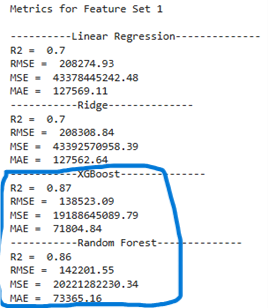

<h2 style="color: #e3db24;">Further Improving the Model 1: MinMaxScaler</h2>

Using MinMax on Feature Set 1, we will concentrate on Linear Regression and XGBoost.

In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
scaler = MinMaxScaler()

In [231]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

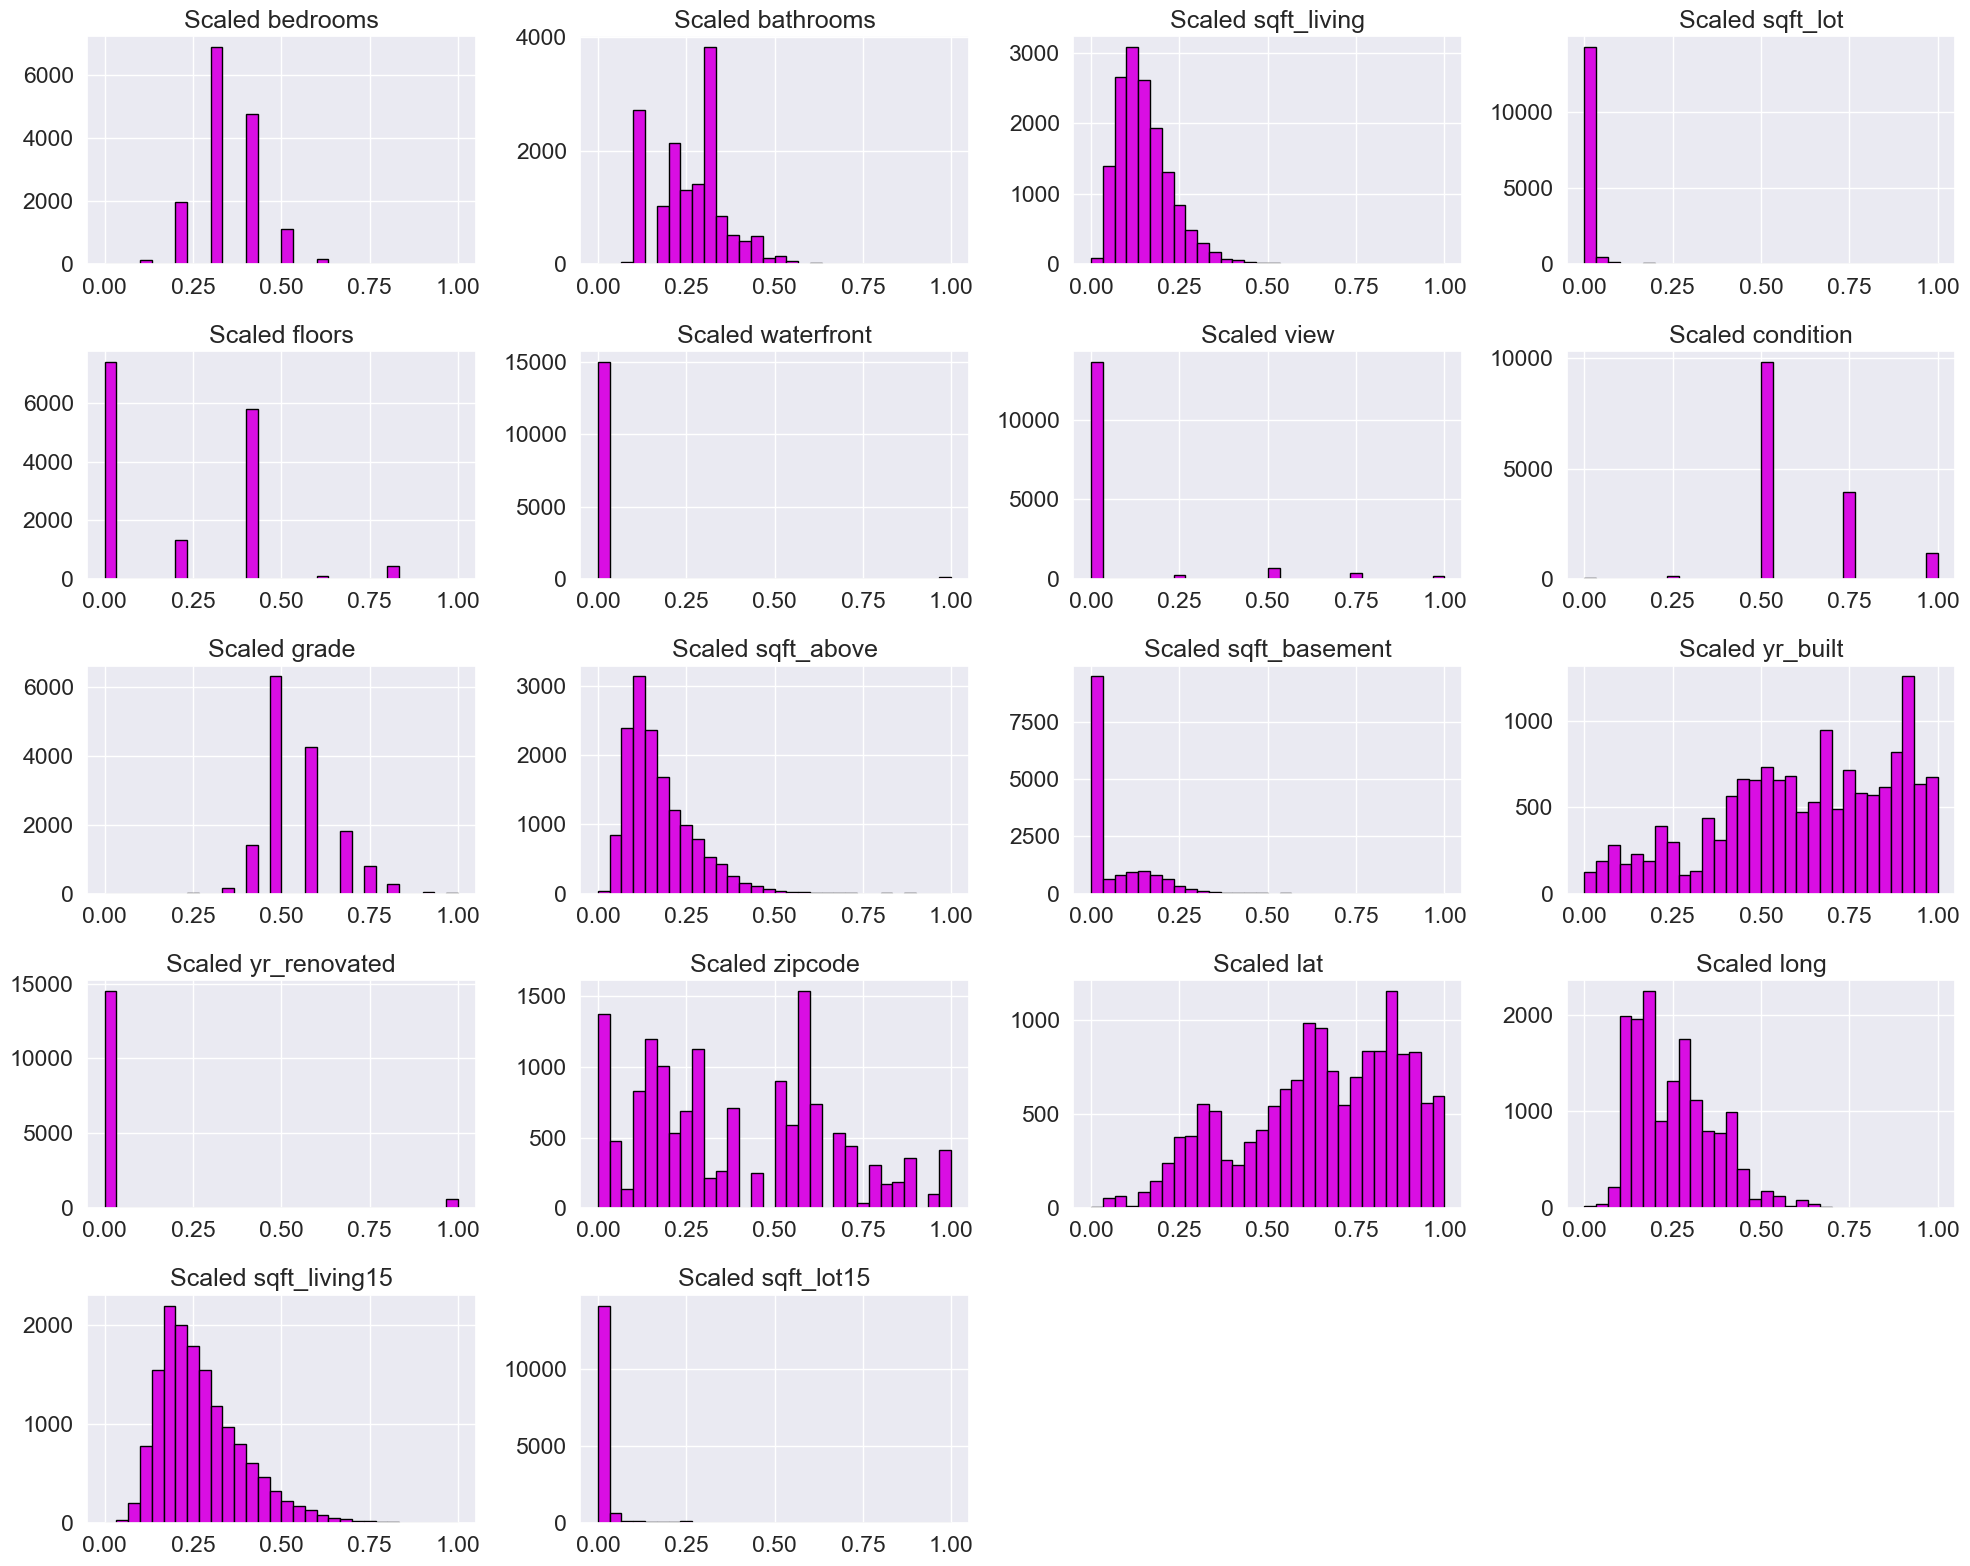

In [232]:
color = '#d90ee3'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {feature_set_1.columns[i]}')

plt.tight_layout()
plt.show()

<h3 style="color: #ec1139;">Linear Regression With Feature Set 1 and Scaled Features</h3>

In [234]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions_linear_scaled = model.predict(X_test_scaled)

In [235]:
r2_LG_scaled = r2_score(y_test, predictions_linear_scaled)
RMSE_LG_scaled = mean_squared_error(y_test, predictions_linear_scaled, squared=False)
MSE_LG_scaled = mean_squared_error(y_test, predictions_linear_scaled)
MAE_LG_scaled = mean_absolute_error(y_test, predictions_linear_scaled)

#Printing the results
print("Linear Regression with")
print("Feature Set 1 and Scaled")
print("R2 = ", round(r2_LG_scaled, 2))
print("RMSE = ", round(RMSE_LG_scaled, 2))
print("MSE = ", round(MSE_LG_scaled, 2))
print("MAE = ", round(MAE_LG_scaled, 2))

Linear Regression with
Feature Set 1 and Scaled
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.48
MAE =  127569.11


**No difference** at all to the Linear Regression without Scaling



<h3 style="color: #ec1139;">XGBoost Regression With Feature Set 1 and Scaled Features</h3>

In [238]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_scaled = xgbr.predict(X_test_scaled)

In [239]:
r2_XG_scaled = r2_score(y_test, predictions_xgb_scaled)
RMSE_XG_scaled = mean_squared_error(y_test, predictions_xgb_scaled, squared=False)
MSE_XG_scaled = mean_squared_error(y_test, predictions_xgb_scaled)
MAE_XG_scaled = mean_absolute_error(y_test, predictions_xgb_scaled)

#Printing the results
print("XGBoost with Feature Set 1")
print(" and Scaled")
print("R2 = ", round(r2_XG_scaled, 2))
print("RMSE = ", round(RMSE_XG_scaled, 2))
print("MSE = ", round(MSE_XG_scaled, 2))
print("MAE = ", round(MAE_XG_scaled, 2))

XGBoost with Feature Set 1
 and Scaled
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


A **very small improvement** compared to XGBoost metrics without scaling (all metrics but R² went down a little).

<h3 style="color: #ec1139;">KNN With Feature Set 1 and Original Features (Feature Set 1)</h3>

Because the two other models showed no reaction to normalization through scaling whatsoever, we will check KNN because it is more likely to be responsive for scaling. Just to be sure our code is not the problem.

In [243]:
from sklearn.neighbors import KNeighborsRegressor

In [244]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [245]:
predictions_knn = knn.predict(X_test)

In [246]:
r2_KNN = r2_score(y_test, predictions_knn)
RMSE_KNN = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_KNN = mean_squared_error(y_test, predictions_knn)
MAE_KNN = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("KNN with Feature Set 1")
print("R2 = ", round(r2_KNN, 2))
print("RMSE = ", round(RMSE_KNN, 2))
print("MSE = ", round(MSE_KNN, 2))
print("MAE = ", round(MAE_KNN, 2))

KNN with Feature Set 1
R2 =  0.49
RMSE =  270494.69
MSE =  73167378121.67
MAE =  164982.81


<h4 style="color: #ec1139;">KNN With Feature Set 1 and Scaled Features (Feature Set 1)</h4>

In [248]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

predictions_knn_scaled = knn.predict(X_test_scaled)

In [249]:
r2_KNN_scaled = r2_score(y_test, predictions_knn_scaled)
RMSE_KNN_scaled = mean_squared_error(y_test, predictions_knn_scaled, squared=False)
MSE_KNN_scaled = mean_squared_error(y_test, predictions_knn_scaled)
MAE_KNN_scaled = mean_absolute_error(y_test, predictions_knn_scaled)

#Printing the results
print("KNN with Feature Set 1")
print(" and Scaled")
print("R2 = ", round(r2_KNN_scaled, 2))
print("RMSE = ", round(RMSE_KNN_scaled, 2))
print("MSE = ", round(MSE_KNN_scaled, 2))
print("MAE = ", round(MAE_KNN_scaled, 2))

KNN with Feature Set 1
 and Scaled
R2 =  0.79
RMSE =  174662.53
MSE =  30507000512.33
MAE =  90121.12


❗**Summary of KNN**: ❗

Responsive to Normalization, so it works but the other models did not "need" this.

Also, even the best metrics for KNN (scaled features) are less good than XGBoost or Random Forest.

<h2 style="color: #e3db24;">Further Improving the Model 2: StandardScaler</h2>

We will use the StandardScaler for Linear Regression and XGBoost (both on Feature Set 1) just to check if this has an effect.

As Standardization is usually more effectful with normal or logarithmic distribution (which we only have a few features of), we do not except much change but w will nevertheless check.

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
scaler = StandardScaler()
X_train_scaled_stand = scaler.fit_transform(X_train)
X_test_scaled_stand = scaler.transform(X_test)

<h3 style="color: #ec1139;">Linear Regression on Feature Set 1 using StandardScaler</h3>

In [256]:
model = LinearRegression()
model.fit(X_train_scaled_stand, y_train)

predictions_linear_scaled_stand = model.predict(X_test_scaled_stand)

In [257]:
r2_LG_scaled_stand = r2_score(y_test, predictions_linear_scaled_stand)
RMSE_LG_scaled_stand = mean_squared_error(y_test, predictions_linear_scaled_stand, squared=False)
MSE_LG_scaled_stand = mean_squared_error(y_test, predictions_linear_scaled_stand)
MAE_LG_scaled_stand = mean_absolute_error(y_test, predictions_linear_scaled_stand)

#Printing the results
print("Linear Regression with")
print("Feature Set 1 and Standardization")
print("R2 = ", round(r2_LG_scaled_stand, 2))
print("RMSE = ", round(RMSE_LG_scaled_stand, 2))
print("MSE = ", round(MSE_LG_scaled_stand, 2))
print("MAE = ", round(MAE_LG_scaled_stand, 2))

Linear Regression with
Feature Set 1 and Standardization
R2 =  0.7
RMSE =  208274.93
MSE =  43378445242.48
MAE =  127569.11


<h3 style="color: #ec1139;">XGBoost Regression on Feature Set 1 using StandardScaler</h3>

In [259]:
xgbr.fit(X_train_scaled_stand, y_train)
predictions_xgb_scaled_stand = xgbr.predict(X_test_scaled_stand)

In [260]:
r2_XG_scaled_stand = r2_score(y_test, predictions_xgb_scaled_stand)
RMSE_XG_scaled_stand = mean_squared_error(y_test, predictions_xgb_scaled_stand, squared=False)
MSE_XG_scaled_stand = mean_squared_error(y_test, predictions_xgb_scaled_stand)
MAE_XG_scaled_stand = mean_absolute_error(y_test, predictions_xgb_scaled_stand)

#Printing the results
print("XGBoost with Feature Set 1")
print("and Standardization")
print("R2 = ", round(r2_XG_scaled_stand, 2))
print("RMSE = ", round(RMSE_XG_scaled_stand, 2))
print("MSE = ", round(MSE_XG_scaled_stand, 2))
print("MAE = ", round(MAE_XG_scaled_stand, 2))

XGBoost with Feature Set 1
and Standardization
R2 =  0.87
RMSE =  138523.09
MSE =  19188645089.79
MAE =  71804.84


❗**Summary of Normalization and Standardization**: ❗

Compared to the metrics we received with Normalization (using MinMaxScaler), we are getting the very same results using StandardScaler.

This **supports the assumption that the models do not need any scaling** of the data, they work well with the given data.

<h2 style="color: #e3db24;">Further Improving the Model 2: Oversampling "waterfront"</h2>

In [263]:
data.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

We will oversample those values in the column "waterfront" which have 1 as value. 1 means that house has a view on the water and it is much less common than houses without this (0). We will therefore fill up the Zeros up to the level of the Ones (21450).

In [265]:
from sklearn.utils import resample

In [266]:
train = pd.concat([X_train, y_train], axis=1)

In [267]:
no_waterfront = train[train['waterfront']==0]
waterfront = train[train['waterfront']==1]

In [268]:
display(no_waterfront.shape)
display(waterfront.shape)

(15022, 19)

(107, 19)

In [269]:
oversampled_waterfront = resample(waterfront,
                                replace=True,  # Sample with replacement
                                n_samples=len(no_waterfront),  # Match number in majority class
                                random_state=42)  # Reproducible results

In [270]:
display(no_waterfront.shape)
display(oversampled_waterfront.shape)

(15022, 19)

(15022, 19)

In [271]:
train_oversampled = pd.concat([no_waterfront,oversampled_waterfront])
train_oversampled.sample(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
6021503830,4,1.00,2080,5500,1.00,0,0,3,7,1040,1040,1941,0,98117,47.68,-122.39,1280,4000,480000.00
4055701200,4,2.75,3120,7898,1.00,1,4,4,8,1560,1560,1963,0,98034,47.72,-122.26,2630,13868,1955000.00


In [272]:
X_train_oversampled = train_oversampled.drop('price',axis = 1).copy()
y_train_oversampled = train_oversampled['price'].copy()

In [273]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_oversampled, y_train_oversampled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [274]:
predictions_XG_oversampled = xgbr.predict(X_test)

In [275]:
r2_XG_oversampled = r2_score(y_test, predictions_XG_oversampled)
RMSE_XG_oversampled = mean_squared_error(y_test, predictions_XG_oversampled, squared=False)
MSE_XG_oversampled = mean_squared_error(y_test, predictions_XG_oversampled)
MAE_XG_oversampled = mean_absolute_error(y_test, predictions_XG_oversampled)

#Printing the results
print("XGBoost (Feature Set 1)")
print("and Oversampled Waterfront")
print("R2 = ", round(r2_XG_oversampled, 2))
print("RMSE = ", round(RMSE_XG_oversampled, 2))
print("MSE = ", round(MSE_XG_oversampled, 2))
print("MAE = ", round(MAE_XG_oversampled, 2))

XGBoost (Feature Set 1)
and Oversampled Waterfront
R2 =  0.85
RMSE =  146310.81
MSE =  21406853984.19
MAE =  73795.23


❗**Summary of Oversampling "waterfront"**: ❗

Good metrics but lower than XGBoost on scaled feature set 1 which is our best so far:

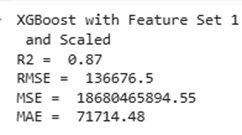

<h2 style="color: #e3db24;">Feature Importance Check</h2>

Features importance checked on the basis of the XGBoost model with Feature Set 1.

In [279]:
feature_names = list(X_train.columns)
importances = xgbr.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

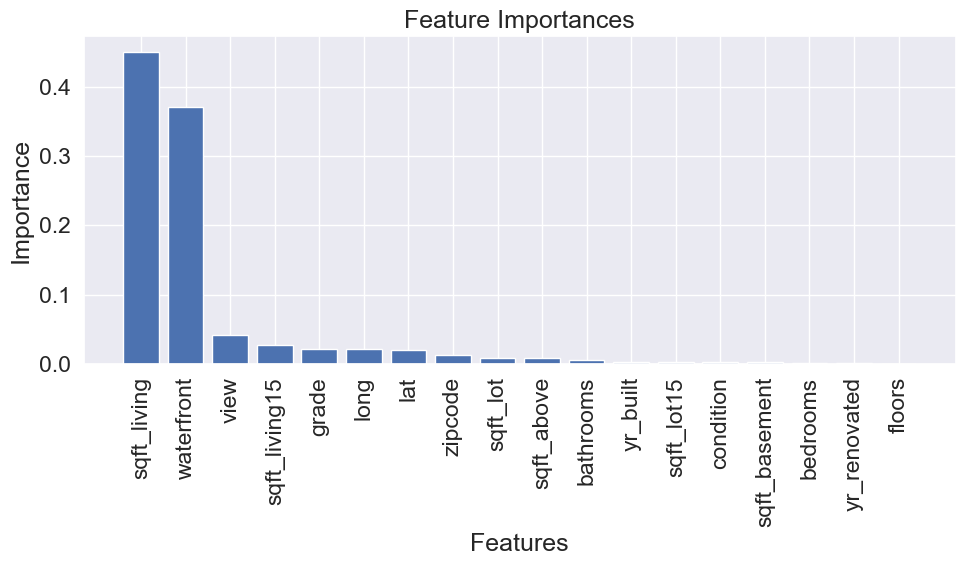

In [280]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<h2 style="color: #e3db24;">Further Improving the Model 3: new set of features with the 11 most important features</h2>

❗**Summary of Feature Importance Check**: ❗

Based on these insights, we will now build a model only with the **11 features** which show some kind of importance:

- sqft_living
- waterfront
- view
- sqft_living15
- grade
- long
- lat
- zipcode
- sqft_lot
- sqft_above
- bathrooms

This will be called "feature_set_best".

For this, we will use **XGBoost** and also **Random Forest** because the latter is less prone to overfitting and we want to compare the results.

A comment: We have tried the following two tests also 1. with excluding all geographical data (**long, lat and zipcode**) and 2. with exluding long and lat but not zipcode. Erasing zipcode proved to have a **big negative impact** on the results whereas long and lat only showed **slight (negative) changes** in the metrics. For these reasons, we decided to** keep all three in this model**.

<h4 style="color: #ec1139;">X-Y Split for Feature Set Best</h4>

In [284]:
feature_set_best = num_all[["price", "sqft_living", "waterfront", "view", "sqft_living15", "grade", "long", "lat", "zipcode", "sqft_lot", "sqft_above", "bathrooms"]]

In [285]:
X_best = feature_set_best.drop("price", axis=1)
y_best = feature_set_best["price"]

<h4 style="color: #ec1139;">Train-Test Split for Feature Set Best</h4>

In [287]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.3, random_state=42)

<h3 style="color: #ec1139;">Random Forest with Feature Set Best</h3>

In [289]:
rfr = RandomForestRegressor()
rfr.fit(X_train_best, y_train_best)
predictions_rf_best = rfr.predict(X_test_best)

In [290]:
r2_RF_best = r2_score(y_test_best, predictions_rf_best)
RMSE_RF_best = mean_squared_error(y_test_best, predictions_rf_best, squared=False)
MSE_RF_best = mean_squared_error(y_test_best, predictions_rf_best)
MAE_RF_best = mean_absolute_error(y_test_best, predictions_rf_best)

#Printing the results
print("Random Forest: 11")
print("most important features")
print("R2 = ", round(r2_RF_best, 2))
print("RMSE = ", round(RMSE_RF_best, 2))
print("MSE = ", round(MSE_RF_best, 2))
print("MAE = ", round(MAE_RF_best, 2))

Random Forest: 11
most important features
R2 =  0.86
RMSE =  140918.91
MSE =  19858137952.16
MAE =  73975.73


<h3 style="color: #ec1139;">XGBoost with Feature Set Best</h3>

In [292]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_best, y_train_best)

predictions_xgb_best = xgbr.predict(X_test_best)

In [293]:
r2_XG_best = r2_score(y_test_best, predictions_xgb_best)
RMSE_XG_best = mean_squared_error(y_test_best, predictions_xgb_best, squared=False)
MSE_XG_best = mean_squared_error(y_test_best, predictions_xgb_best)
MAE_XG_best = mean_absolute_error(y_test_best, predictions_xgb_best)

#Printing the results
print("XGBoost: 11")
print("most important features")
print("R2 = ", round(r2_XG_best, 2))
print("RMSE = ", round(RMSE_XG_best, 2))
print("MSE = ", round(MSE_XG_best, 2))
print("MAE = ", round(MAE_XG_best, 2))

XGBoost: 11
most important features
R2 =  0.86
RMSE =  141715.54
MSE =  20083295574.23
MAE =  73526.72


❗**Summary of Feature Set Best**: ❗

The **R²** of both models is very high, yet **the other metrics remain high** too (the lower, the better as they represent the difference between the prediction and the empirical data points).

The **Random Forest here shows slightly better results** than the XGBoost but very slightly "worse" results than **our best model until now**:

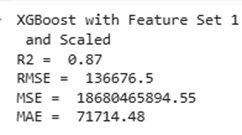



<h2 style="color: #e3db24;">Final Improving the Model: Outliers erased before Model Building</h2>

Finally, we want to see whether eliminating outliers before bulding the model makes a difference. For this, we will define a datset with features which have a lot of outliers. We will then erase all rows from the original df which contains at least one of the so defined outliers, so that all our columns, including our taregt have the same structure.

In [297]:
# erasing outliers (based on condition defined below) from all features but our target "price"
features_wo_outliers = num_all.drop(columns=['price'])

In [298]:
# function to identify all outliers
def outliers(features_wo_outliers):
  Q1 = features_wo_outliers.quantile(0.25)
  Q3 = features_wo_outliers.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = (features_wo_outliers < lower_bound) | (features_wo_outliers > upper_bound)

  return outliers

# mask which sets all cells to False in order to filter out rows which contain outliers identified in the above function (next step)
outlier_mask = pd.DataFrame(False, index=num_all.index, columns=num_all.columns)

# function outliers is being applied on every feature and True assigned to outlier_mask if it is an outlier
for feature in features_wo_outliers:
    outlier_mask[feature] = outliers(num_all[feature])

# df for all rows which have at least one outlier
combined_outlier_mask = outlier_mask.any(axis=1)

# erasing these rows from the original dataset
num_all_cleaned_outliers = num_all[~combined_outlier_mask]

num_all_cleaned_outliers

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,221900.00
5631500400,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,180000.00
2487200875,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,604000.00
1954400510,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,510000.00
1321400060,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,257500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,360000.00
6600060120,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,400000.00
1523300141,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,402101.00


<h4 style="color: #ec1139;">X-Y Split for Feature Set No Outliers</h4>

In [300]:
X_outliers = num_all_cleaned_outliers.drop("price", axis=1)
y_outliers = num_all_cleaned_outliers["price"]

<h4 style="color: #ec1139;">Train-Test Split for Feature Set No Outliers</h4>

In [302]:
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.3, random_state=42)

<h3 style="color: #ec1139;">Linear Regression with Feature Set No Outliers</h3>

In [304]:
model = LinearRegression()
model.fit(X_train_outliers, y_train_outliers)

predictions_linear_outliers = model.predict(X_test_outliers)

In [305]:
r2_LR_outliers = r2_score(y_test_outliers, predictions_linear_outliers)
RMSE_LR_outliers = mean_squared_error(y_test_outliers, predictions_linear_outliers, squared=False)
MSE_LR_outliers = mean_squared_error(y_test_outliers, predictions_linear_outliers)
MAE_LR_outliers = mean_absolute_error(y_test_outliers, predictions_linear_outliers)

#Printing the results
print("Linear Regression with")
print("no Outliers in Train")
print("R2 = ", round(r2_LR_outliers, 2))
print("RMSE = ", round(RMSE_LR_outliers, 2))
print("MSE = ", round(MSE_LR_outliers, 2))
print("MAE = ", round(MAE_LR_outliers, 2))

Linear Regression with
no Outliers in Train
R2 =  0.64
RMSE =  121179.13
MSE =  14684381672.02
MAE =  86238.81


<h3 style="color: #ec1139;">XGBoost with Feature Set No Outliers</h3>

In [307]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_outliers, y_train_outliers)

predictions_xgb_outliers = xgbr.predict(X_test_outliers)

In [308]:
r2_XG_outliers = r2_score(y_test_outliers, predictions_xgb_outliers)
RMSE_XG_outliers = mean_squared_error(y_test_outliers, predictions_xgb_outliers, squared=False)
MSE_XG_outliers = mean_squared_error(y_test_outliers, predictions_xgb_outliers)
MAE_XG_outliers = mean_absolute_error(y_test_outliers, predictions_xgb_outliers)

#Printing the results
print("XGBoost with")
print("no Outliers in Train")
print(f"R2 = {r2_XG_outliers:.2f}")
print(f"RMSE = {RMSE_XG_outliers:,.2f}")
print(f"MSE = {MSE_XG_outliers:,.2f}")
print(f"MAE = {MAE_XG_outliers:,.2f}")

XGBoost with
no Outliers in Train
R2 = 0.87
RMSE = 72,731.09
MSE = 5,289,810,875.94
MAE = 48,567.98


❗**Summary of Feature Set No Outliers**: ❗

This step brought a major increasement in the metrics.

**Linear Regression**: even though the **R²** went down a little (baseline model: 0.7), the **other metrics improved very much**: the **RSME** and the **MAE** decreased ~1/3 to 1/2, and the **MSE** (which of course is most effected by outliers as it is a squared value) decreased almost by two thirds.

**XGBoost**: for **RSME** and **MAE** goes the same as for the Linear Regression, the **MSE** even decreased by almost 3/4. One big difference is that the** R² stayed very high**.

So this is our **best model after all**.

<h2 style="color: #e3db24;">Model for only high priced houses</h2>

Here we analyze all houses above the 0.75 percentile separately. This means all houses which cost more than USD 650,000.

In [312]:
houses_high_prices

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7237550310,4,4.50,5420,101930,1.00,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,1225000.00
1736800520,3,2.50,3560,9796,1.00,0,0,3,8,1860,1700,1965,0,98007,47.60,-122.14,2210,8925,662500.00
9297300055,4,3.00,2950,5000,2.00,0,3,3,9,1980,970,1979,0,98126,47.57,-122.38,2140,4000,650000.00
2524049179,3,2.75,3050,44867,1.00,0,4,3,9,2330,720,1968,0,98040,47.53,-122.23,4110,20336,2000000.00
1794500383,3,1.75,2450,2691,2.00,0,0,3,8,1750,700,1915,0,98119,47.64,-122.36,1760,3573,937000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502800100,5,2.75,3600,9437,2.00,0,0,3,9,3600,0,2014,0,98059,47.48,-122.13,3550,9421,679950.00
191100405,4,3.25,3410,10125,2.00,0,0,3,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125,1575000.00
7202300110,4,3.00,3990,7838,2.00,0,0,3,9,3990,0,2003,0,98053,47.69,-122.05,3370,6814,810000.00


<h4 style="color: #ec1139;">X-Y Split for High Prices Houses</h4>

In [314]:
feature_high_price = houses_high_prices.copy()

In [315]:
X_high_price = feature_high_price.drop("price", axis=1)
y_high_price = feature_high_price["price"]

<h4 style="color: #ec1139;">Train-Test Split for High Prices Houses</h4>

In [317]:
X_train_high_price, X_test_high_price, y_train_high_price, y_test_high_price = train_test_split(X_high_price, y_high_price, test_size=0.3, random_state=42)

<h3 style="color: #ec1139;">Linear Regression for High Prices Houses</h3>


In [319]:
model = LinearRegression()
model.fit(X_train_high_price, y_train_high_price)

predictions_linear_high_price = model.predict(X_test_high_price)

In [320]:
r2_LG_high_price = r2_score(y_test_high_price, predictions_linear_high_price)
RMSE_LG_high_price = mean_squared_error(y_test_high_price, predictions_linear_high_price, squared=False)
MSE_LG_high_price = mean_squared_error(y_test_high_price, predictions_linear_high_price)
MAE_LG_high_price = mean_absolute_error(y_test_high_price, predictions_linear_high_price)

#Printing the results
print("Linear Regression with")
print("High Priced Houses")
print("R2 = ", round(r2_LG_high_price, 2))
print("RMSE = ", round(RMSE_LG_high_price, 2))
print("MSE = ", round(MSE_LG_high_price, 2))
print("MAE = ", round(MAE_LG_high_price, 2))

Linear Regression with
High Priced Houses
R2 =  0.58
RMSE =  285684.92
MSE =  81615874280.33
MAE =  189651.16


<h3 style="color: #ec1139;">XGBoost for High Prices Houses</h3>




In [322]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_high_price, y_train_high_price)

predictions_xgb_high_prices = xgbr.predict(X_test_high_price)

In [323]:
r2_XG_high_price = r2_score(y_test_high_price, predictions_xgb_high_prices)
RMSE_XG_high_price = mean_squared_error(y_test_high_price, predictions_xgb_high_prices, squared=False)
MSE_XG_high_price = mean_squared_error(y_test_high_price, predictions_xgb_high_prices)
MAE_XG_high_price = mean_absolute_error(y_test_high_price, predictions_xgb_high_prices)

#Printing the results
print("XGBoost with")
print("High Priced Houses")
print("R2 = ", round(r2_XG_high_price, 2))
print("RMSE = ", round(RMSE_XG_high_price, 2))
print("MSE = ", round(MSE_XG_high_price, 2))
print("MAE = ", round(MAE_XG_high_price, 2))

XGBoost with
High Priced Houses
R2 =  0.74
RMSE =  226525.45
MSE =  51313778390.76
MAE =  125005.88


❗**Summary for High Priced Houses**: ❗

The metrics for predicting high priced houses are high. Yet, they are lower than when predicting all types of prices (with and without outliers).